#DATA FRAME (RAW)

In [41]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/adult income.csv')

# Display the first few rows of the dataset
print(df.head())
df.describe()
df.shape
df.columns


   age workclass     education         occupation     sex  hours.per.week  \
0   82   Private       HS-grad    Exec-managerial  Female              18   
1   54   Private       7th-8th  Machine-op-inspct  Female              40   
2   41   Private  Some-college     Prof-specialty  Female              40   
3   34   Private       HS-grad      Other-service  Female              45   
4   38   Private          10th       Adm-clerical    Male              40   

   capital.loss income  
0          4356  <=50K  
1          3900  <=50K  
2          3900  <=50K  
3          3770  <=50K  
4          3770  <=50K  


Index(['age', 'workclass', 'education', 'occupation', 'sex', 'hours.per.week',
       'capital.loss', 'income'],
      dtype='object')

#Data Cleaning

In [79]:
import pandas as pd

# Load the dataset
data_path = '/content/adult income.csv'
df = pd.read_csv(data_path)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Check the actual column names
print("Actual columns in the dataset:", df.columns.tolist())

# Correct the column names in the columns_to_keep list
columns_to_keep = ['age', 'workclass', 'education', 'occupation',
                   'sex', 'hours.per.week', 'capital.loss', 'income']

# Keep only the required columns
df = df[[col for col in columns_to_keep if col in df.columns]]

# Replace 0s in 'capital.loss' column with the mean of that column
capital_loss_mean = df['capital.loss'].replace(0, pd.NA).mean()  # Compute mean of non-zero values
df['capital.loss'].replace(0, capital_loss_mean, inplace=True)

# Replace NaN values in 'age' column with the mean of 'age'
age_mean = df['age'].mean()  # Compute the mean of 'age'
df['age'].fillna(age_mean, inplace=True)

# Drop rows with NaN values (if any column still has missing values)
df.dropna(inplace=True)

# Save the cleaned dataset
df.to_csv('/content/cleaned_adult_income.csv', index=False)

# Verify the shape of the resulting dataset
print("Data cleaning complete.")
print(f"Cleaned dataset shape: {df.shape}")
print(f"Columns in cleaned dataset: {list(df.columns)}")


Actual columns in the dataset: ['age', 'workclass', 'education', 'occupation', 'sex', 'hours.per.week', 'capital.loss', 'income']
Data cleaning complete.
Cleaned dataset shape: (30718, 8)
Columns in cleaned dataset: ['age', 'workclass', 'education', 'occupation', 'sex', 'hours.per.week', 'capital.loss', 'income']


<ipython-input-79-0b58e25adcc3>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['capital.loss'].replace(0, capital_loss_mean, inplace=True)
<ipython-input-79-0b58e25adcc3>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

#Verification for Data-Cleaning

In [80]:
import pandas as pd

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Check unique values for categorical columns
print("\nUnique values in 'workclass' column:")
print(df['workclass'].unique())

print("\nUnique values in 'education' column:")
print(df['education'].unique())


Missing values in each column:
age               0
workclass         0
education         0
occupation        0
sex               0
hours.per.week    0
capital.loss      0
income            0
dtype: int64

Number of duplicate rows:
8454

Data types of each column:
age                 int64
workclass          object
education          object
occupation         object
sex                object
hours.per.week      int64
capital.loss      float64
income             object
dtype: object

Summary statistics for numeric columns:
                age  hours.per.week  capital.loss
count  30718.000000    30718.000000  30718.000000
mean      38.443584       40.949313   1869.366188
std       13.118227       11.985382     79.068885
min       17.000000        1.000000    155.000000
25%       28.000000       40.000000   1869.366188
50%       37.000000       40.000000   1869.366188
75%       47.000000       45.000000   1869.366188
max       90.000000       99.000000   4356.000000

Unique values in 'work

#Duplicate rows

In [81]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/adult income.csv')

# Remove duplicates: Keep the first occurrence and remove the rest of the duplicates
df.drop_duplicates(keep='first', inplace=True)

# Verify the shape of the dataset after removing duplicates
print(f"Dataset shape after keeping one copy of duplicates: {df.shape}")

# Save the cleaned dataset as a new CSV file
df.to_csv('/content/final-data.csv', index=False)

# Let the user know the file has been saved
print("Cleaned dataset saved as 'final-data.csv'.")



Dataset shape after keeping one copy of duplicates: (22264, 8)
Cleaned dataset saved as 'final-data.csv'.


#Data Cleaning using Ydata Profilling(visualization)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

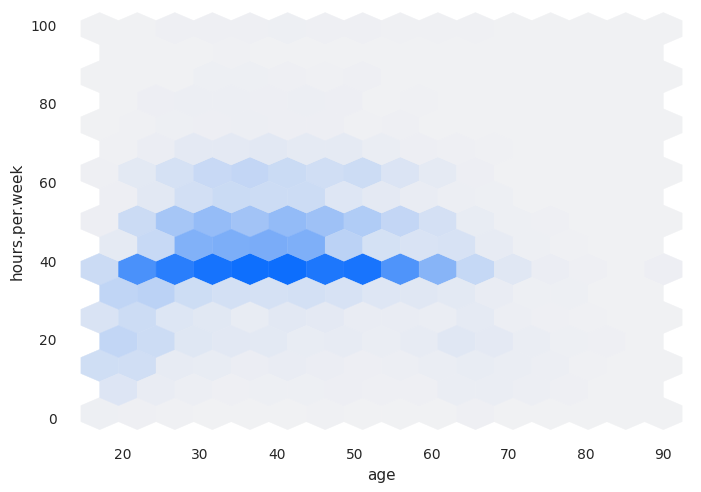

In [83]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('/content/final-data.csv')

profile = ProfileReport(df, title="YData Profiling Report", explorative=True)

profile.to_file("/content/ydata_profiling_report.html")

from google.colab import files
files.download('/content/ydata_profiling_report.html')

print("YData Profiling Report generated and ready for download.")

In [85]:
df.describe()

,age,workclass,education,occupation,sex,hours.per.week,capital.loss,income
0,82,Private,HS-grad,Exec-managerial,Female,18,4356.0,<=50K
1,54,Private,7th-8th,Machine-op-inspct,Female,40,3900.0,<=50K
2,41,Private,Some-college,Prof-specialty,Female,40,3900.0,<=50K
3,34,Private,HS-grad,Other-service,Female,45,3770.0,<=50K
4,38,Private,10th,Adm-clerical,Male,40,3770.0,<=50K
...,...,...,...,...,...,...,...,...
95,41,Self-emp-inc,Prof-school,Exec-managerial,Female,55,2415.0,>50K
96,36,Private,Bachelors,Sales,Male,45,2415.0,>50K
97,38,Private,Prof-school,Prof-specialty,Male,90,2415.0,>50K
98,54,Private,Some-college,Sales,Male,50,2415.0,>50K


#STATISTICAL CALCULATION /PYTHON IMPLEMENTATION

<ipython-input-142-fb7a2f44a8bf>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table_age = df.groupby('Age_Binned').agg(
<ipython-input-142-fb7a2f44a8bf>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table_cap_loss = df.groupby('Capital_Loss_Binned').agg(
<ipython-input-142-fb7a2f44a8bf>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table_hours_worked = df.groupby('Hours_Worked_B

Frequency Distribution Table for 'Capital Loss':
  Capital Loss Range  Frequency   Mean_Age  Mean_Hours_Worked
0              0-499          9  43.777778          35.777778
1            500-999         25  44.000000          42.160000
2          1000-1499         96  41.458333          42.687500
3          1500-1999      21832  39.988824          41.399826
4          2000-2499        262  45.103053          44.416031
5          2500-2999         31  44.064516          46.870968
6          3000-3499          2  43.000000          47.500000
7          3500-3999          6  51.500000          37.500000
8          4000-4499          1  82.000000          18.000000
9          4500-4999          0        NaN                NaN

Frequency Distribution Table for 'Hours Worked per Week':
  Hours Worked Range  Frequency   Mean_Age  Mean_Capital_Loss
0                0-9        284  42.823944        1868.348483
1              10-19        927  37.075512        1867.132084
2              20-29    

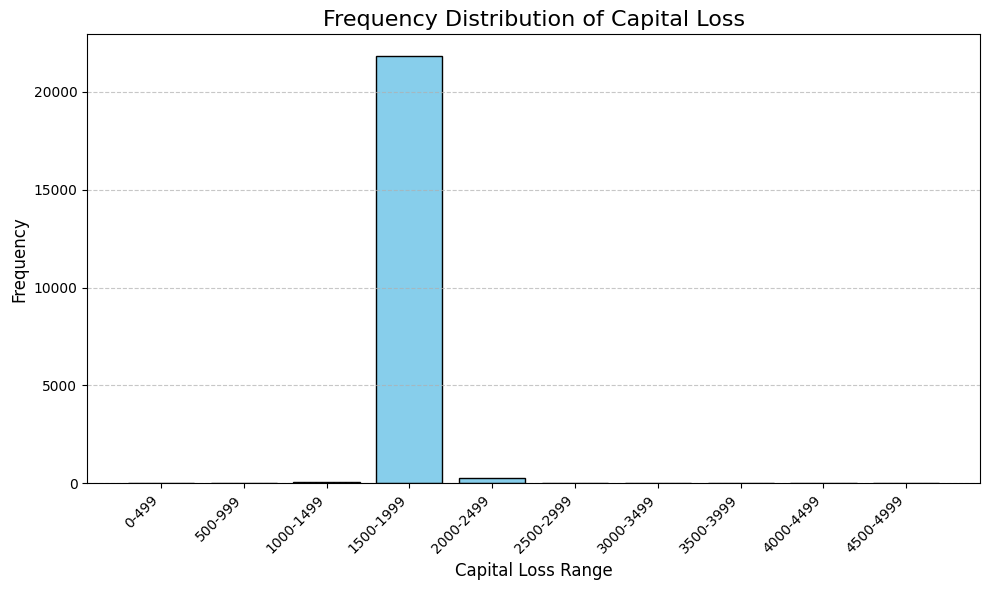

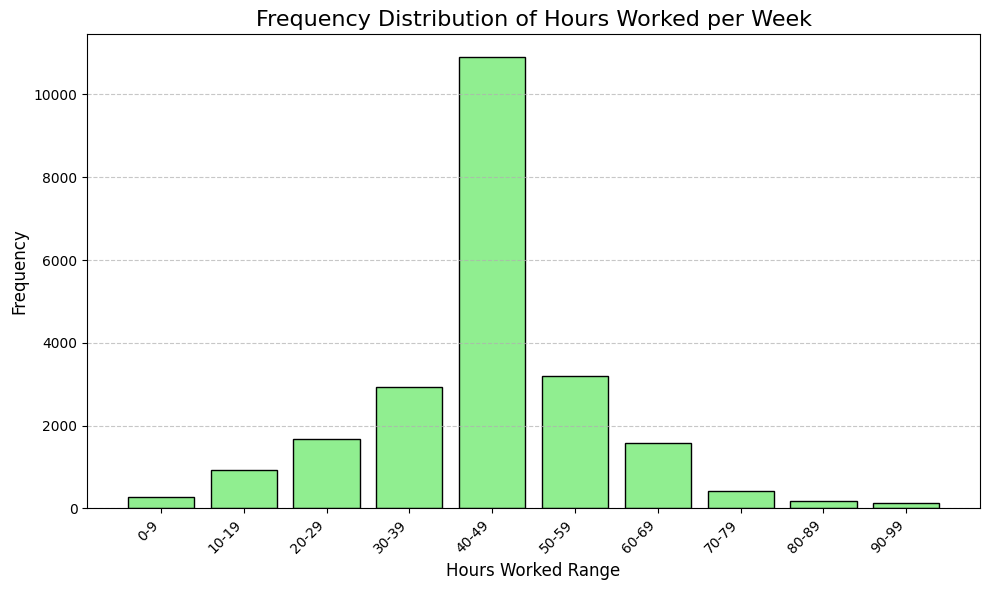

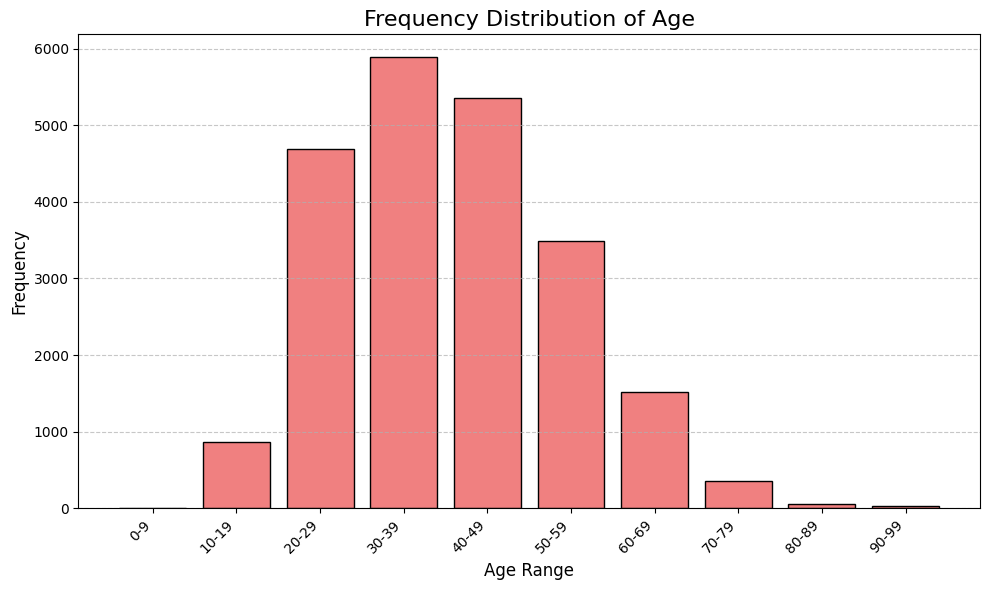

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# Define the bins for Capital Loss
capital_loss_bins = [i for i in range(0, 5001, 500)]  # For capital loss (0-5000 range)
capital_loss_labels = [f"{capital_loss_bins[i]}-{capital_loss_bins[i+1]-1}" for i in range(len(capital_loss_bins)-1)]

# Create binned data for Capital Loss
df['Capital_Loss_Binned'] = pd.cut(df['capital.loss'], bins=capital_loss_bins, labels=capital_loss_labels, right=False, include_lowest=True)

# Define the bins for Hours Worked per Week
hours_worked_bins = [i for i in range(0, 101, 10)]  # For hours worked (0-100 range)
hours_worked_labels = [f"{hours_worked_bins[i]}-{hours_worked_bins[i+1]-1}" for i in range(len(hours_worked_bins)-1)]

# Create binned data for Hours Worked per Week
df['Hours_Worked_Binned'] = pd.cut(df['hours.per.week'], bins=hours_worked_bins, labels=hours_worked_labels, right=False, include_lowest=True)

# Define the bins for Age (0 to 100 range in steps of 10 years)
age_bins = [i for i in range(0, 101, 10)]  # For age (0-100 range)
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]

# Create binned data for Age
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Create the frequency distribution tables with mean values
frequency_table_age = df.groupby('Age_Binned').agg(
    Frequency=('age', 'count'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()
frequency_table_age.rename(columns={'Age_Binned': 'Age Range'}, inplace=True)

frequency_table_cap_loss = df.groupby('Capital_Loss_Binned').agg(
    Frequency=('capital.loss', 'count'),
    Mean_Age=('age', 'mean'),
    Mean_Hours_Worked=('hours.per.week', 'mean')
).reset_index()
frequency_table_cap_loss.rename(columns={'Capital_Loss_Binned': 'Capital Loss Range'}, inplace=True)

frequency_table_hours_worked = df.groupby('Hours_Worked_Binned').agg(
    Frequency=('hours.per.week', 'count'),
    Mean_Age=('age', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()
frequency_table_hours_worked.rename(columns={'Hours_Worked_Binned': 'Hours Worked Range'}, inplace=True)

# Display the frequency distribution tables
print("Frequency Distribution Table for 'Capital Loss':")
print(frequency_table_cap_loss)

print("\nFrequency Distribution Table for 'Hours Worked per Week':")
print(frequency_table_hours_worked)

print("\nFrequency Distribution Table for 'Age':")
print(frequency_table_age)

# Save the updated frequency tables to CSV files
frequency_table_cap_loss.to_csv('/content/capital_loss_frequency_table_updated.csv', index=False)
frequency_table_hours_worked.to_csv('/content/hours_worked_frequency_table_updated.csv', index=False)
frequency_table_age.to_csv('/content/age_frequency_table_updated.csv', index=False)

# Plotting the frequency distribution with mean values for context

# Plot for Capital Loss
plt.figure(figsize=(10, 6))
plt.bar(frequency_table_cap_loss['Capital Loss Range'], frequency_table_cap_loss['Frequency'], color='skyblue', edgecolor='black')
plt.title("Frequency Distribution of Capital Loss", fontsize=16)
plt.xlabel("Capital Loss Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

# Plot for Hours Worked per Week
plt.figure(figsize=(10, 6))
plt.bar(frequency_table_hours_worked['Hours Worked Range'], frequency_table_hours_worked['Frequency'], color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution of Hours Worked per Week", fontsize=16)
plt.xlabel("Hours Worked Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

# Plot for Age
plt.figure(figsize=(10, 6))
plt.bar(frequency_table_age['Age Range'], frequency_table_age['Frequency'], color='lightcoral', edgecolor='black')
plt.title("Frequency Distribution of Age", fontsize=16)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()


Frequency Distribution Table for 'Capital Loss':
  Capital Loss Range  Frequency
0              0-499          9
1            500-999         25
2          1000-1499         96
3          1500-1999      21832
4          2000-2499        262
5          2500-2999         31
6          3000-3499          2
7          3500-3999          6
8          4000-4499          1
9          4500-4999          0

Frequency Distribution Table for 'Hours Worked per Week':
  Hours Worked Range  Frequency
0                0-9        284
1              10-19        927
2              20-29       1665
3              30-39       2940
4              40-49      10908
5              50-59       3203
6              60-69       1590
7              70-79        428
8              80-89        187
9              90-99        132

Frequency Distribution Table for 'Age':
  Age Range  Frequency
0       0-9          0
1     10-19        866
2     20-29       4689
3     30-39       5892
4     40-49       5357
5     50-

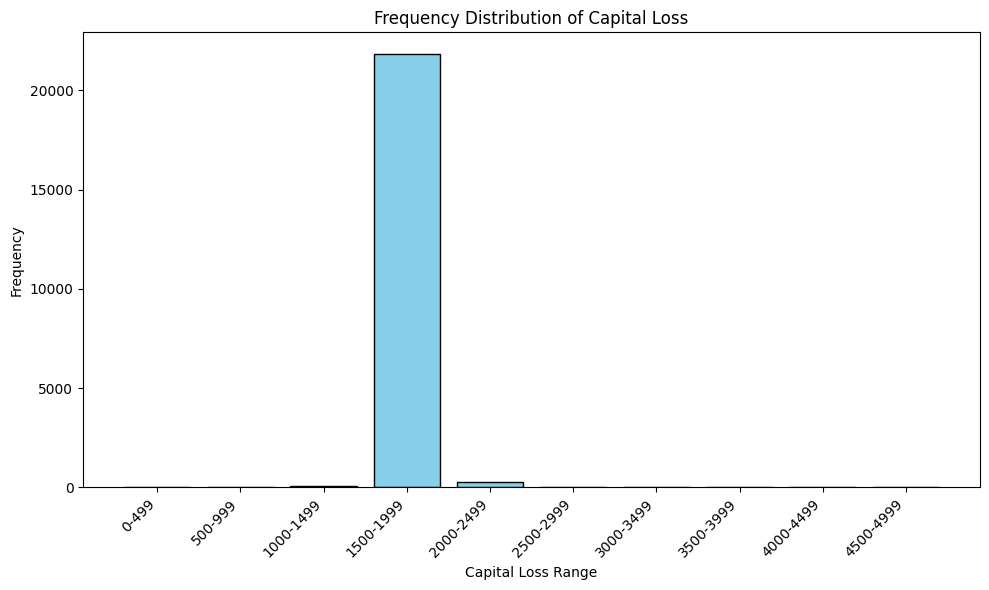

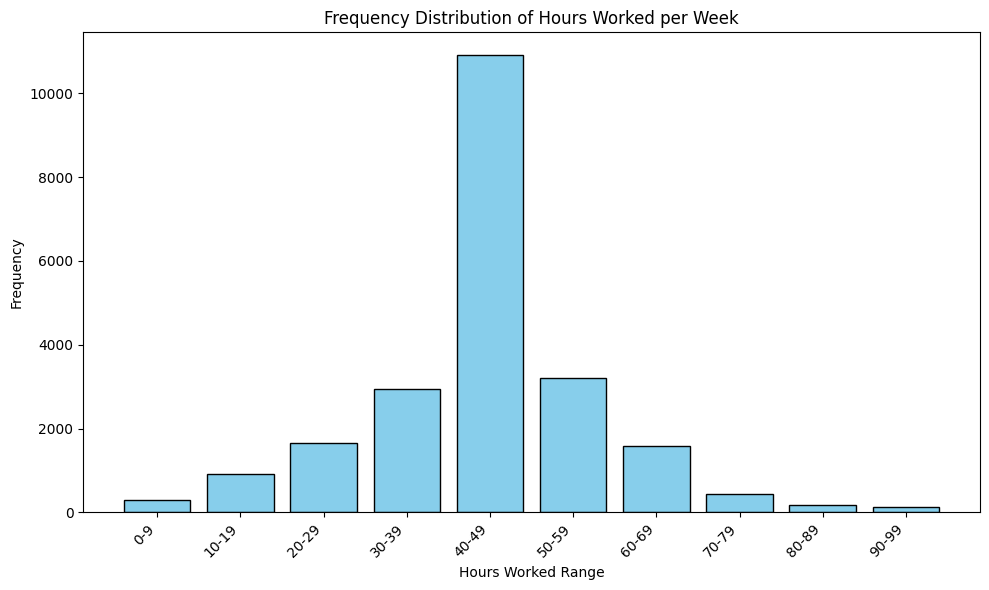

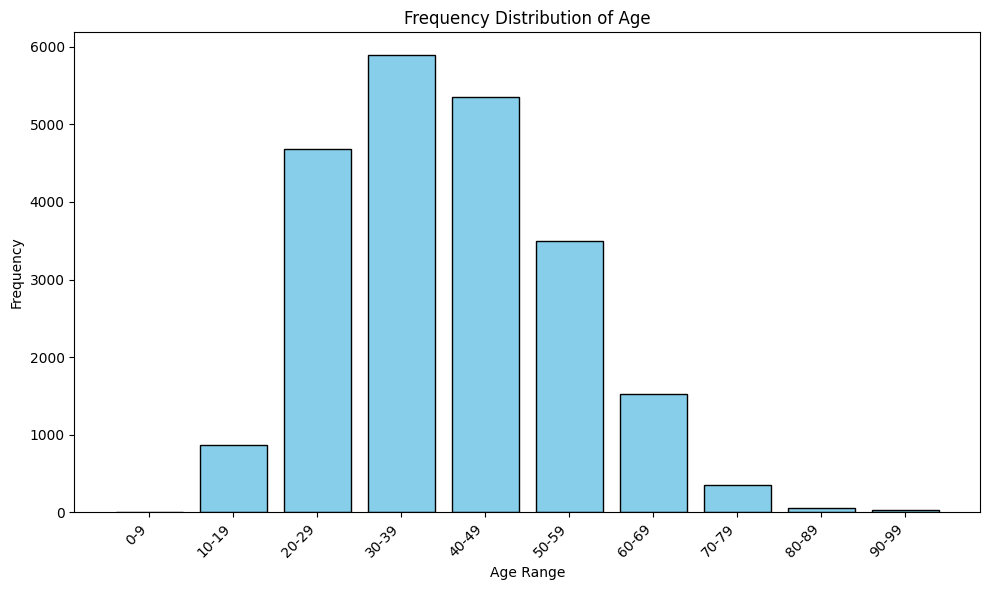

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# Define the bins for Capital Loss
capital_loss_bins = [i for i in range(0, 5001, 500)]  # For capital loss (0-5000 range)
capital_loss_labels = [f"{capital_loss_bins[i]}-{capital_loss_bins[i+1]-1}" for i in range(len(capital_loss_bins)-1)]

# Create binned data for Capital Loss
df['Capital_Loss_Binned'] = pd.cut(df['capital.loss'], bins=capital_loss_bins, labels=capital_loss_labels, right=False, include_lowest=True)

# Define the bins for Hours Worked per Week
hours_worked_bins = [i for i in range(0, 101, 10)]  # For hours worked (0-100 range)
hours_worked_labels = [f"{hours_worked_bins[i]}-{hours_worked_bins[i+1]-1}" for i in range(len(hours_worked_bins)-1)]

# Create binned data for Hours Worked per Week
df['Hours_Worked_Binned'] = pd.cut(df['hours.per.week'], bins=hours_worked_bins, labels=hours_worked_labels, right=False, include_lowest=True)

# Define the bins for Age (0 to 100 range in steps of 10 years)
age_bins = [i for i in range(0, 101, 10)]  # For age (0-100 range)
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]

# Create binned data for Age
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Create the frequency distribution tables with mean values
frequency_table_age = df.groupby('Age_Binned').agg(
    Frequency=('age', 'count'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()
frequency_table_age.rename(columns={'Age_Binned': 'Age Range'}, inplace=True)

frequency_table_cap_loss = df.groupby('Capital_Loss_Binned').agg(
    Frequency=('capital.loss', 'count'),
    Mean_Age=('age', 'mean'),
    Mean_Hours_Worked=('hours.per.week', 'mean')
).reset_index()
frequency_table_cap_loss.rename(columns={'Capital_Loss_Binned': 'Capital Loss Range'}, inplace=True)

frequency_table_hours_worked = df.groupby('Hours_Worked_Binned').agg(
    Frequency=('hours.per.week', 'count'),
    Mean_Age=('age', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()
frequency_table_hours_worked.rename(columns={'Hours_Worked_Binned': 'Hours Worked Range'}, inplace=True)

# Display the frequency distribution tables
print("Frequency Distribution Table for 'Capital Loss':")
print(frequency_table_cap_loss)

print("\nFrequency Distribution Table for 'Hours Worked per Week':")
print(frequency_table_hours_worked)

print("\nFrequency Distribution Table for 'Age':")
print(frequency_table_age)

# Save the updated frequency tables to CSV files
frequency_table_cap_loss.to_csv('/content/capital_loss_frequency_table_updated.csv', index=False)
frequency_table_hours_worked.to_csv('/content/hours_worked_frequency_table_updated.csv', index=False)
frequency_table_age.to_csv('/content/age_frequency_table_updated.csv', index=False)

# Plotting the frequency distribution with mean values for context

# Plot for Capital Loss
plt.figure(figsize=(10, 6))
plt.bar(frequency_table_cap_loss['Capital Loss Range'], frequency_table_cap_loss['Frequency'], color='skyblue', edgecolor='black')
plt.title("Frequency Distribution of Capital Loss", fontsize=16)
plt.xlabel("Capital Loss Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

# Plot for Hours Worked per Week
plt.figure(figsize=(10, 6))
plt.bar(frequency_table_hours_worked['Hours Worked Range'], frequency_table_hours_worked['Frequency'], color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution of Hours Worked per Week", fontsize=16)
plt.xlabel("Hours Worked Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

# Plot for Age
plt.figure(figsize=(10, 6))
plt.bar(frequency_table_age['Age Range'], frequency_table_age['Frequency'], color='lightcoral', edgecolor='black')
plt.title("Frequency Distribution of Age", fontsize=16)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()


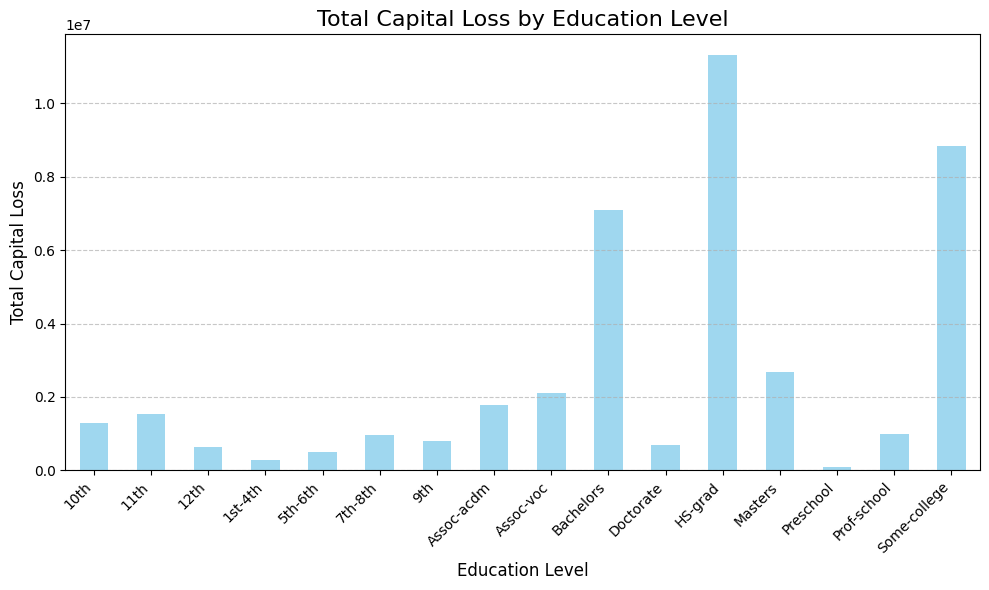

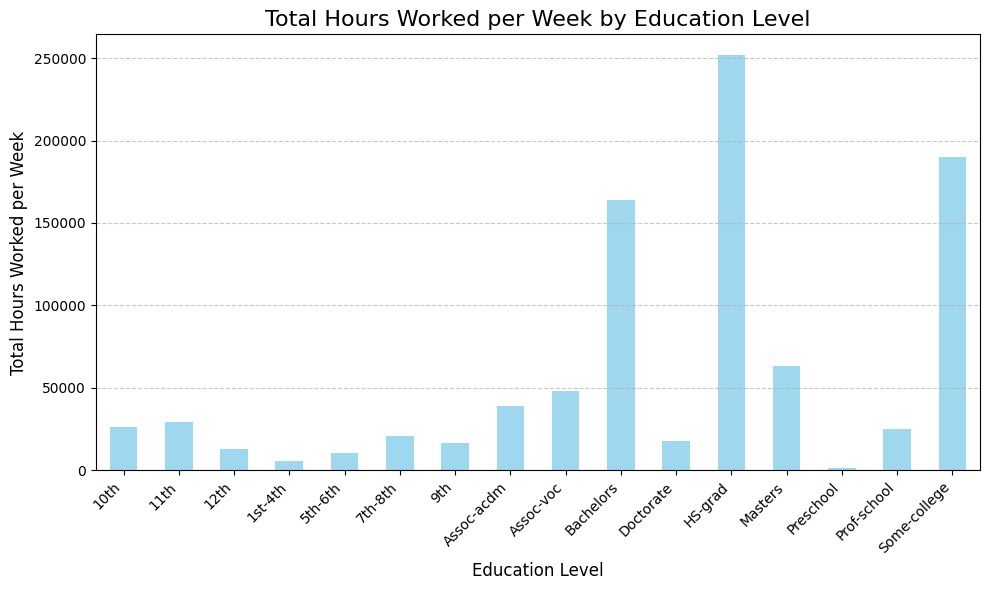

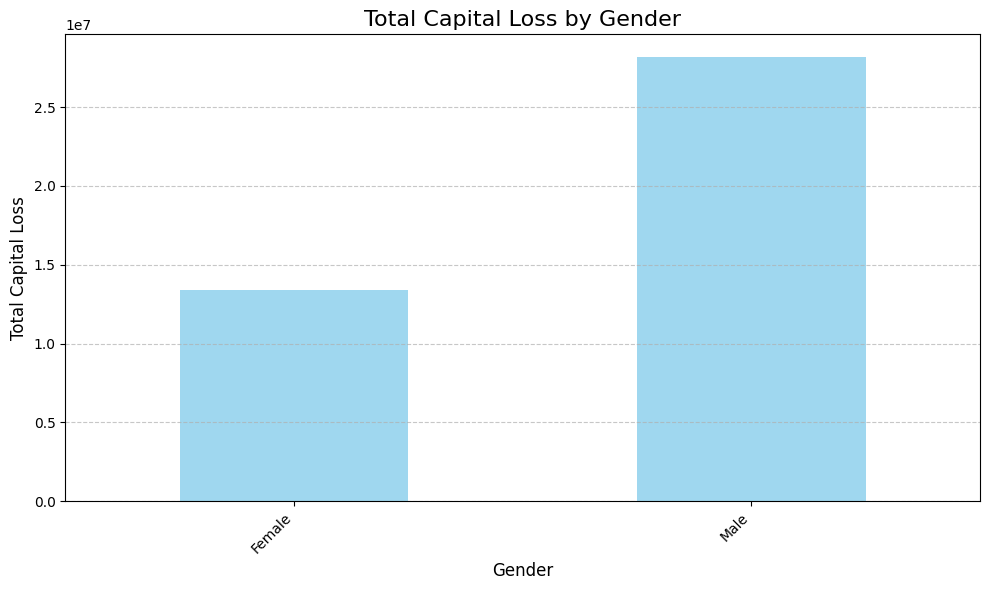

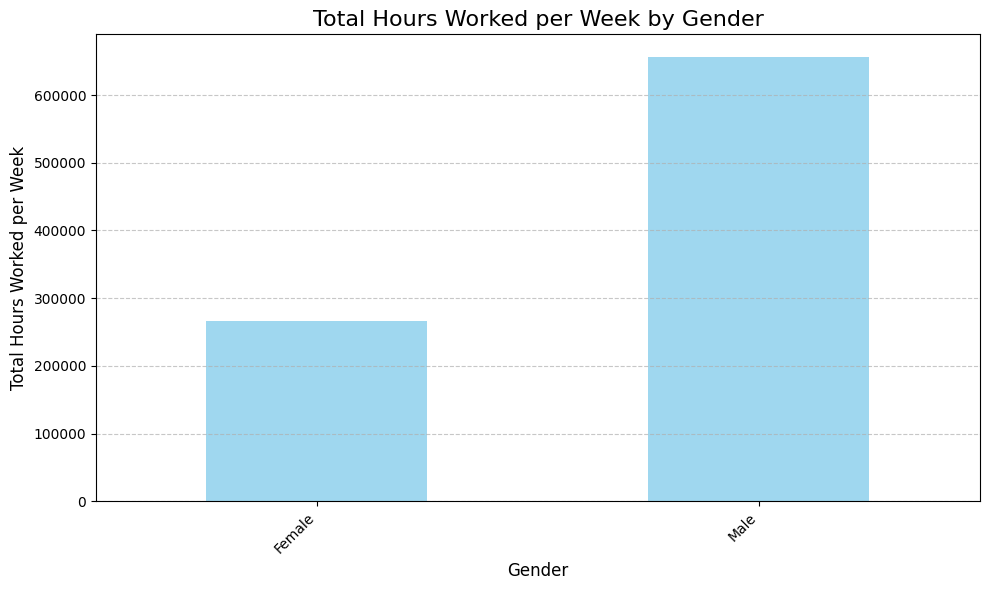

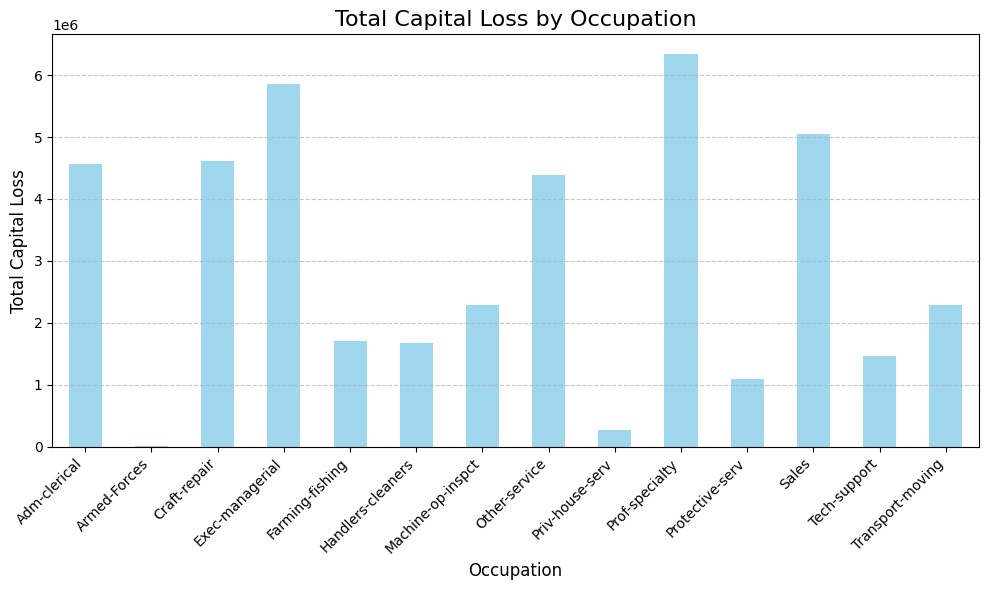

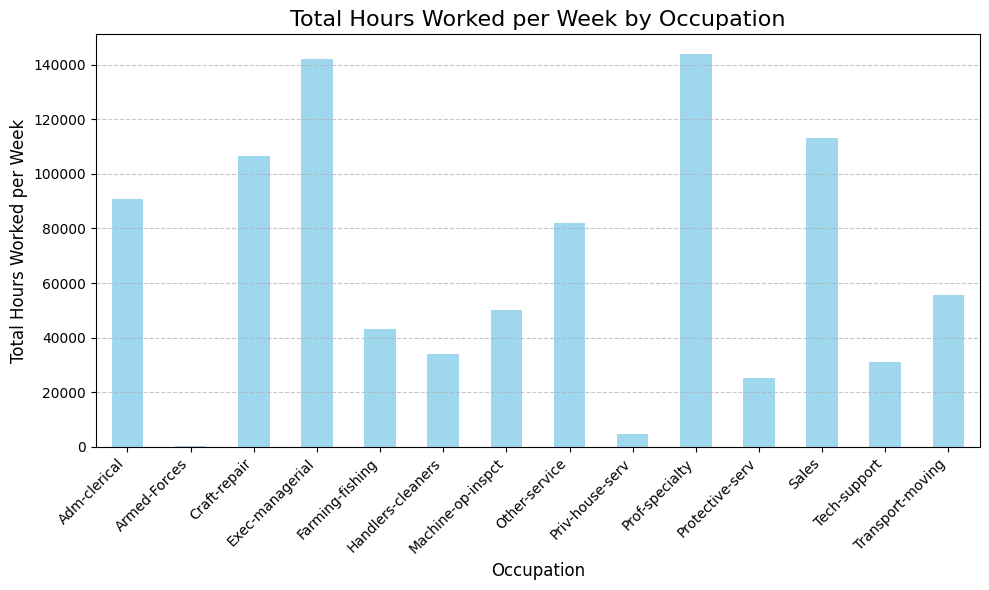

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# Group by 'education', 'sex', and 'occupation' and aggregate sum of 'capital.loss' and 'hours.per.week'
education_grouped = df.groupby('education')[['capital.loss', 'hours.per.week']].sum()
sex_grouped = df.groupby('sex')[['capital.loss', 'hours.per.week']].sum()
occupation_grouped = df.groupby('occupation')[['capital.loss', 'hours.per.week']].sum()

# Function to create bar charts
def plot_bar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data[column].plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Bar chart for Capital Loss by Education
plot_bar_chart(education_grouped, 'capital.loss', 'Total Capital Loss by Education Level', 'Education Level', 'Total Capital Loss')

# Bar chart for Hours Worked per Week by Education
plot_bar_chart(education_grouped, 'hours.per.week', 'Total Hours Worked per Week by Education Level', 'Education Level', 'Total Hours Worked per Week')

# Bar chart for Capital Loss by Sex
plot_bar_chart(sex_grouped, 'capital.loss', 'Total Capital Loss by Gender', 'Gender', 'Total Capital Loss')

# Bar chart for Hours Worked per Week by Sex
plot_bar_chart(sex_grouped, 'hours.per.week', 'Total Hours Worked per Week by Gender', 'Gender', 'Total Hours Worked per Week')

# Bar chart for Capital Loss by Occupation
plot_bar_chart(occupation_grouped, 'capital.loss', 'Total Capital Loss by Occupation', 'Occupation', 'Total Capital Loss')

# Bar chart for Hours Worked per Week by Occupation
plot_bar_chart(occupation_grouped, 'hours.per.week', 'Total Hours Worked per Week by Occupation', 'Occupation', 'Total Hours Worked per Week')


<ipython-input-96-097e3ec9f683>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_occupation_stats = df.groupby(['Age_Binned', 'occupation'])[['capital.loss', 'hours.per.week']].sum().unstack(fill_value=0)


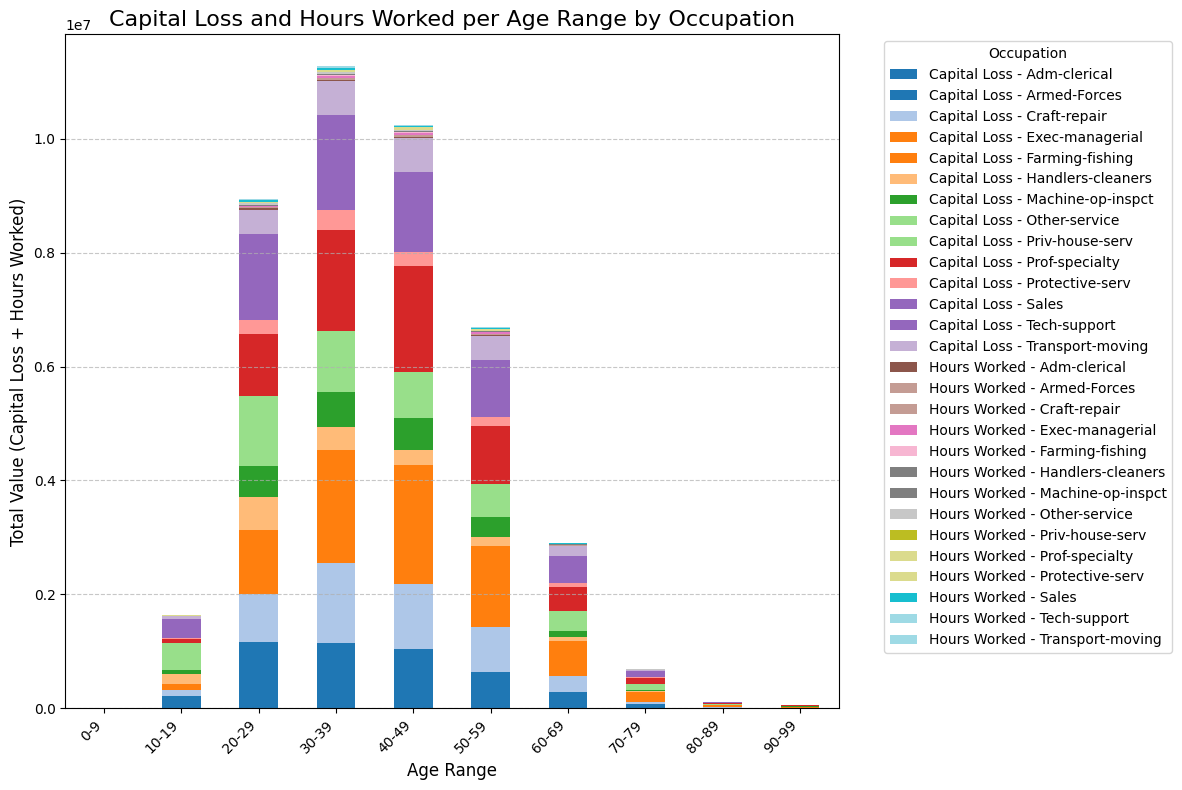

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# Define the bins for Age (0-100 range in steps of 10 years)
age_bins = [i for i in range(0, 101, 10)]  # For age (0-100 range)
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]

# Create binned data for Age
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Define the bins for Capital Loss (0-5000 range)
capital_loss_bins = [i for i in range(0, 5001, 500)]
capital_loss_labels = [f"{capital_loss_bins[i]}-{capital_loss_bins[i+1]-1}" for i in range(len(capital_loss_bins)-1)]

# Create binned data for Capital Loss
df['Capital_Loss_Binned'] = pd.cut(df['capital.loss'], bins=capital_loss_bins, labels=capital_loss_labels, right=False, include_lowest=True)

# Define the bins for Hours Worked per Week (0-100 range)
hours_worked_bins = [i for i in range(0, 101, 10)]
hours_worked_labels = [f"{hours_worked_bins[i]}-{hours_worked_bins[i+1]-1}" for i in range(len(hours_worked_bins)-1)]

# Create binned data for Hours Worked per Week
df['Hours_Worked_Binned'] = pd.cut(df['hours.per.week'], bins=hours_worked_bins, labels=hours_worked_labels, right=False, include_lowest=True)

# Group by 'Age_Binned' and 'Occupation' and calculate the sum of 'capital.loss' and 'hours.per.week'
age_occupation_stats = df.groupby(['Age_Binned', 'occupation'])[['capital.loss', 'hours.per.week']].sum().unstack(fill_value=0)

# Flatten the MultiIndex columns for better readability
age_occupation_stats.columns = ['Capital Loss - ' + str(col[1]) if col[0] == 'capital.loss' else 'Hours Worked - ' + str(col[1]) for col in age_occupation_stats.columns]

# Plotting the stacked component bar chart
age_occupation_stats.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

# Adding titles and labels
plt.title('Capital Loss and Hours Worked per Age Range by Occupation', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Total Value (Capital Loss + Hours Worked)', fontsize=12)

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adding legend and gridlines
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to ensure no content is clipped
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-106-76a25bf24fc0>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_hours = df.groupby('Age_Binned')['hours.per.week'].mean()


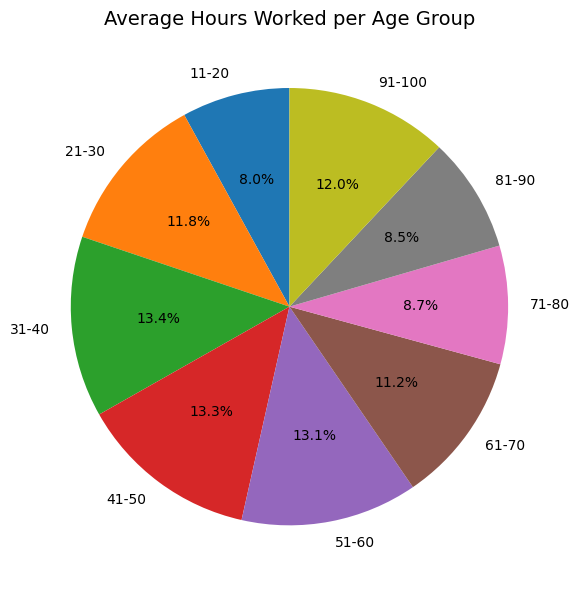

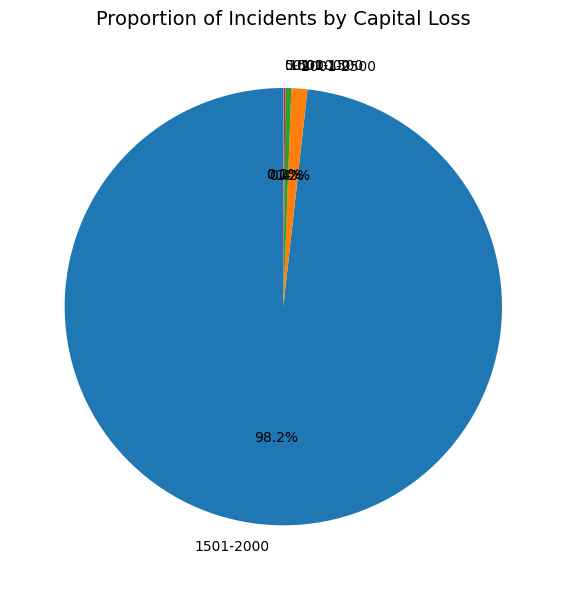

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# 1. Group by Age and Calculate Average Hours Worked (per age group)
# Define the bins and labels for age ranges
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Bin the 'age' data
df['Age_Binned'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

# Calculate the average hours worked per age group
age_group_hours = df.groupby('Age_Binned')['hours.per.week'].mean()

# Remove NaN values from the age group data to avoid errors in pie chart
age_group_hours = age_group_hours.dropna()

# Pie chart for average hours worked per age group
plt.figure(figsize=(6, 6))  # Smaller pie chart
plt.pie(age_group_hours, labels=age_group_hours.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Hours Worked per Age Group', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Pie chart for 'capital.loss' - Categorized by ranges of capital loss
# Define bins and labels for capital loss
bins_loss = [0, 500, 1000, 1500, 2000, 2500]
labels_loss = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500']

# Bin the 'capital.loss' data
df['capital.loss_binned'] = pd.cut(df['capital.loss'], bins=bins_loss, labels=labels_loss, right=False)

# Pie chart for capital loss
plt.figure(figsize=(6, 6))  # Smaller pie chart
capital_loss_counts = df['capital.loss_binned'].value_counts()
plt.pie(capital_loss_counts, labels=capital_loss_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Incidents by Capital Loss', fontsize=14)
plt.tight_layout()
plt.show()


In [147]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Create binned data for Age
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table for Age, Hours, and Capital Loss
freq_table = df.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# --- Ungrouped Arithmetic Mean Function ---
def arithmetic_mean_ungrouped(data):
    return np.mean(data)

# --- Grouped Arithmetic Mean Function ---
def arithmetic_mean_grouped(freq_table, column_name):
    # Convert the 'Age_Binned' column to strings and parse for midpoints
    freq_table['Midpoint'] = freq_table['Age_Binned'].astype(str).apply(
        lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
    )

    # Calculate the arithmetic mean for grouped data
    fi_xi = (freq_table['Frequency'] * freq_table[column_name]).sum()
    fi_sum = freq_table['Frequency'].sum()
    am = fi_xi / fi_sum
    return am

# --- Calculating Arithmetic Mean for Ungrouped Data (Hours and Capital Loss) ---
hours_ungrouped_am = arithmetic_mean_ungrouped(df['hours.per.week'].values)
capital_loss_ungrouped_am = arithmetic_mean_ungrouped(df['capital.loss'].values)

# --- Calculating Arithmetic Mean for Grouped Data (Hours and Capital Loss) ---
hours_grouped_am = arithmetic_mean_grouped(freq_table, 'Mean_Hours_Worked')
capital_loss_grouped_am = arithmetic_mean_grouped(freq_table, 'Mean_Capital_Loss')

# Print results
print(f"Arithmetic Mean (Ungrouped) for Hours Worked: {hours_ungrouped_am}")
print(f"Arithmetic Mean (Ungrouped) for Capital Loss: {capital_loss_ungrouped_am}")
print(f"Arithmetic Mean (Grouped) for Hours Worked: {hours_grouped_am}")
print(f"Arithmetic Mean (Grouped) for Capital Loss: {capital_loss_grouped_am}")


Arithmetic Mean (Ungrouped) for Hours Worked: 41.445517427236794
Arithmetic Mean (Ungrouped) for Capital Loss: 1869.353522615676
Arithmetic Mean (Grouped) for Hours Worked: 41.445517427236794
Arithmetic Mean (Grouped) for Capital Loss: 1869.3535226156755


<ipython-input-147-4d44cd929bac>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = df.groupby('Age_Binned').agg(


In [148]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Create binned data for Age
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table for Age, Hours, and Capital Loss
freq_table = df.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# --- Ungrouped Geometric Mean Function ---
def geometric_mean_ungrouped(data):
    return np.exp(np.mean(np.log(data)))

# --- Grouped Geometric Mean Function ---
def geometric_mean_grouped(freq_table, column_name):
    # Convert the 'Age_Binned' column to strings and parse for midpoints
    freq_table['Midpoint'] = freq_table['Age_Binned'].astype(str).apply(
        lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
    )

    # Calculate the geometric mean for grouped data
    product_of_fi_xi = (freq_table['Frequency'] * freq_table[column_name]).prod()  # Product of (fi * xi)
    fi_sum = freq_table['Frequency'].sum()

    gm = product_of_fi_xi ** (1 / fi_sum)
    return gm

# --- Calculating Geometric Mean for Ungrouped Data (Hours and Capital Loss) ---
hours_ungrouped_gm = geometric_mean_ungrouped(df['hours.per.week'].values)
capital_loss_ungrouped_gm = geometric_mean_ungrouped(df['capital.loss'].values)

# --- Calculating Geometric Mean for Grouped Data (Hours and Capital Loss) ---
hours_grouped_gm = geometric_mean_grouped(freq_table, 'Mean_Hours_Worked')
capital_loss_grouped_gm = geometric_mean_grouped(freq_table, 'Mean_Capital_Loss')

# Print results
print(f"Geometric Mean (Ungrouped) for Hours Worked: {hours_ungrouped_gm}")
print(f"Geometric Mean (Ungrouped) for Capital Loss: {capital_loss_ungrouped_gm}")
print(f"Geometric Mean (Grouped) for Hours Worked: {hours_grouped_gm}")
print(f"Geometric Mean (Grouped) for Capital Loss: {capital_loss_grouped_gm}")


Geometric Mean (Ungrouped) for Hours Worked: 38.7291056984668
Geometric Mean (Ungrouped) for Capital Loss: 1866.327278868816
Geometric Mean (Grouped) for Hours Worked: 1.0042170371755597
Geometric Mean (Grouped) for Capital Loss: 1.005822844735873


<ipython-input-148-e084b90c5403>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = df.groupby('Age_Binned').agg(


In [149]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Create binned data for Age
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table for Age, Hours, and Capital Loss
freq_table = df.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Add Midpoint for each age bin
freq_table['Midpoint'] = freq_table['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# --- Ungrouped Harmonic Mean Function ---
def harmonic_mean_ungrouped(data):
    return len(data) / np.sum(1 / data)

# --- Grouped Harmonic Mean Function ---
def harmonic_mean_grouped(freq_table, column_name):
    # Convert the 'Age_Binned' column to strings and parse for midpoints
    freq_table['Midpoint'] = freq_table['Age_Binned'].astype(str).apply(
        lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
    )

    # Calculate the harmonic mean for grouped data
    fi_sum = freq_table['Frequency'].sum()
    fi_xi_inverse_sum = (freq_table['Frequency'] / freq_table[column_name]).sum()

    hm = fi_sum / fi_xi_inverse_sum
    return hm

# --- Calculating Harmonic Mean for Ungrouped Data (Hours and Capital Loss) ---
hours_ungrouped_hm = harmonic_mean_ungrouped(df['hours.per.week'].values)
capital_loss_ungrouped_hm = harmonic_mean_ungrouped(df['capital.loss'].values)

# --- Calculating Harmonic Mean for Grouped Data (Hours and Capital Loss) ---
hours_grouped_hm = harmonic_mean_grouped(freq_table, 'Mean_Hours_Worked')
capital_loss_grouped_hm = harmonic_mean_grouped(freq_table, 'Mean_Capital_Loss')

# Print results
print(f"Harmonic Mean (Ungrouped) for Hours Worked: {hours_ungrouped_hm}")
print(f"Harmonic Mean (Ungrouped) for Capital Loss: {capital_loss_ungrouped_hm}")
print(f"Harmonic Mean (Grouped) for Hours Worked: {hours_grouped_hm}")
print(f"Harmonic Mean (Grouped) for Capital Loss: {capital_loss_grouped_hm}")


Harmonic Mean (Ungrouped) for Hours Worked: 33.968015856726026
Harmonic Mean (Ungrouped) for Capital Loss: 1860.0440910142495
Harmonic Mean (Grouped) for Hours Worked: 40.86158613072095
Harmonic Mean (Grouped) for Capital Loss: 1869.3409805294016


<ipython-input-149-c88892d4f77c>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = df.groupby('Age_Binned').agg(


In [150]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]
df['Age_Binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table
freq_table = df.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

freq_table['Midpoint'] = freq_table['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# --- Ungrouped Median Function ---
def median_ungrouped(data):
    return np.median(data)

# --- Grouped Median Function ---
def median_grouped(freq_table, column_name):
    freq_table['Cumulative_Frequency'] = freq_table['Frequency'].cumsum()
    total_observations = freq_table['Frequency'].sum()
    median_class = freq_table[freq_table['Cumulative_Frequency'] >= total_observations / 2].iloc[0]

    L = median_class['Midpoint'] - 5
    N = total_observations
    F = median_class['Cumulative_Frequency'] - median_class['Frequency']
    f = median_class['Frequency']
    h = 10

    return L + ((N / 2 - F) / f) * h

# --- Calculating Median for Ungrouped Data ---
hours_ungrouped_median = median_ungrouped(df['hours.per.week'].values)
capital_loss_ungrouped_median = median_ungrouped(df['capital.loss'].values)

# --- Calculating Median for Grouped Data ---
hours_grouped_median = median_grouped(freq_table, 'Mean_Hours_Worked')
capital_loss_grouped_median = median_grouped(freq_table, 'Mean_Capital_Loss')

# Print results
print(f"Median (Ungrouped) for Hours Worked: {hours_ungrouped_median}")
print(f"Median (Ungrouped) for Capital Loss: {capital_loss_ungrouped_median}")
print(f"Median (Grouped) for Hours Worked: {hours_grouped_median}")
print(f"Median (Grouped) for Capital Loss: {capital_loss_grouped_median}")


Median (Ungrouped) for Hours Worked: 40.0
Median (Ungrouped) for Capital Loss: 1869.366187542779
Median (Grouped) for Hours Worked: 38.96537678207739
Median (Grouped) for Capital Loss: 38.96537678207739


<ipython-input-150-890d2a3a752b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = df.groupby('Age_Binned').agg(


In [156]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Ensure consistent table usage
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# --- Ungrouped Mode Function ---
def mode_ungrouped(data):
    return data.mode()[0]

# Ungrouped Mode for Capital Loss
capital_loss_ungrouped_mode = mode_ungrouped(df1['capital.loss'])
print(f"Mode (Ungrouped) for Capital Loss: {capital_loss_ungrouped_mode}")

# Ungrouped Mode for Hours Worked
hours_ungrouped_mode = mode_ungrouped(df1['hours.per.week'])
print(f"Mode (Ungrouped) for Hours Worked: {hours_ungrouped_mode}")

# --- Grouped Mode Function ---
def mode_grouped(freq_table, column_name):
    # Find the mode class (class with the highest frequency)
    mode_class = freq_table.loc[freq_table[column_name].idxmax()]

    # Extract values for calculation
    L = mode_class['Midpoint'] - 5  # Lower boundary of the mode class
    f = mode_class['Frequency']  # Frequency of the mode class
    f0 = freq_table.iloc[mode_class.name - 1]['Frequency'] if mode_class.name > 0 else 0  # Frequency of the previous class
    f2 = freq_table.iloc[mode_class.name + 1]['Frequency'] if mode_class.name < len(freq_table) - 1 else 0  # Frequency of the next class
    w = 10  # Width of the class (fixed for this scenario)

    # Calculate the mode for grouped data using the formula
    mode = L + ((f - f0) / ((2 * f) - f0 - f2)) * w
    return mode

# Grouped Mode for Capital Loss
capital_loss_grouped_mode = mode_grouped(freq_table_age, 'Mean_Capital_Loss')
print(f"Mode (Grouped) for Capital Loss: {capital_loss_grouped_mode}")

# Grouped Mode for Hours Worked
hours_grouped_mode = mode_grouped(freq_table_age, 'Mean_Hours_Worked')
print(f"Mode (Grouped) for Hours Worked: {hours_grouped_mode}")


Mode (Ungrouped) for Capital Loss: 1869.366187542779
Mode (Ungrouped) for Hours Worked: 40
Mode (Grouped) for Capital Loss: 90.3273381294964
Mode (Grouped) for Hours Worked: 36.42174913693901


<ipython-input-156-d2380a35f947>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#QUARTILE DECILES AND PERCENTILES

In [180]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Labels

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Binning

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),  # Frequency
    Mean_Hours_Worked=('hours.per.week', 'mean'),  # Mean Hours
    Mean_Capital_Loss=('capital.loss', 'mean')  # Mean Loss
).reset_index()

# Add midpoints for use in percentile, decile, and quartile calculations
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Midpoint
)

# --- Percentiles, Deciles, and Quartiles for Grouped Data ---
def calculate_percentile_grouped(freq_table, column_name, percentile):  # Percentile Calc
    # Find the cumulative frequency for each class
    freq_table['Cumulative_Frequency'] = freq_table['Frequency'].cumsum()  # Cumulative

    # Total number of observations
    total = freq_table['Frequency'].sum()  # Total

    # Percentile position formula: (Percentile / 100) * Total
    position = (percentile / 100) * total  # Position

    # Find the class containing the percentile
    percentile_class = freq_table.loc[freq_table['Cumulative_Frequency'] >= position].iloc[0]  # Class

    # Extract values for calculation
    L = percentile_class['Midpoint'] - 5  # Lower boundary
    F = percentile_class['Cumulative_Frequency']  # Cumulative freq of class
    F_prev = freq_table.iloc[percentile_class.name - 1]['Cumulative_Frequency'] if percentile_class.name > 0 else 0  # Prev Freq
    f = percentile_class['Frequency']  # Class frequency
    w = 10  # Class width

    # Calculate the percentile using the formula
    percentile_value = L + ((position - F_prev) / f) * w  # Formula
    return percentile_value

# Calculate the required percentiles, deciles, and quartiles for **Hours Worked** and **Capital Loss**
percentile_25_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 25)  # 25th Pct
percentile_50_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 50)  # Median
percentile_75_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 75)  # 75th Pct

percentile_25_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 25)  # 25th Pct
percentile_50_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 50)  # Median
percentile_75_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 75)  # 75th Pct

# Deciles (10%, 20%, ..., 90%) for Hours Worked and Capital Loss
decile_10_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 10)  # 10th Dec
decile_20_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 20)  # 20th Dec
decile_30_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 30)  # 30th Dec
decile_40_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 40)  # 40th Dec
decile_50_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 50)  # Median
decile_60_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 60)  # 60th Dec
decile_70_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 70)  # 70th Dec
decile_80_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 80)  # 80th Dec
decile_90_hours = calculate_percentile_grouped(freq_table_age, 'Mean_Hours_Worked', 90)  # 90th Dec

decile_10_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 10)  # 10th Dec
decile_20_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 20)  # 20th Dec
decile_30_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 30)  # 30th Dec
decile_40_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 40)  # 40th Dec
decile_50_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 50)  # Median
decile_60_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 60)  # 60th Dec
decile_70_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 70)  # 70th Dec
decile_80_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 80)  # 80th Dec
decile_90_loss = calculate_percentile_grouped(freq_table_age, 'Mean_Capital_Loss', 90)  # 90th Dec

# Quartiles for Hours Worked and Capital Loss
quartile_25_hours = percentile_25_hours  # Q1
quartile_50_hours = percentile_50_hours  # Q2
quartile_75_hours = percentile_75_hours  # Q3

quartile_25_loss = percentile_25_loss  # Q1
quartile_50_loss = percentile_50_loss  # Q2
quartile_75_loss = percentile_75_loss  # Q3

# Display Results
print(f"25th Percentile (Hours Worked): {percentile_25_hours}")
print(f"50th Percentile (Hours Worked): {percentile_50_hours}")
print(f"75th Percentile (Hours Worked): {percentile_75_hours}")
print(f"25th Percentile (Capital Loss): {percentile_25_loss}")
print(f"50th Percentile (Capital Loss): {percentile_50_loss}")
print(f"75th Percentile (Capital Loss): {percentile_75_loss}")

print("\nDeciles for Hours Worked:")
print(f"10th Decile (Hours Worked): {decile_10_hours}")
print(f"20th Decile (Hours Worked): {decile_20_hours}")
print(f"30th Decile (Hours Worked): {decile_30_hours}")
print(f"40th Decile (Hours Worked): {decile_40_hours}")
print(f"50th Decile (Hours Worked): {decile_50_hours}")
print(f"60th Decile (Hours Worked): {decile_60_hours}")
print(f"70th Decile (Hours Worked): {decile_70_hours}")
print(f"80th Decile (Hours Worked): {decile_80_hours}")
print(f"90th Decile (Hours Worked): {decile_90_hours}")

print("\nDeciles for Capital Loss:")
print(f"10th Decile (Capital Loss): {decile_10_loss}")
print(f"20th Decile (Capital Loss): {decile_20_loss}")
print(f"30th Decile (Capital Loss): {decile_30_loss}")
print(f"40th Decile (Capital Loss): {decile_40_loss}")
print(f"50th Decile (Capital Loss): {decile_50_loss}")
print(f"60th Decile (Capital Loss): {decile_60_loss}")
print(f"70th Decile (Capital Loss): {decile_70_loss}")
print(f"80th Decile (Capital Loss): {decile_80_loss}")
print(f"90th Decile (Capital Loss): {decile_90_loss}")

print("\nQuartiles for Hours Worked:")
print(f"25th Quartile (Hours Worked): {quartile_25_hours}")
print(f"50th Quartile (Hours Worked): {quartile_50_hours}")
print(f"75th Quartile (Hours Worked): {quartile_75_hours}")

print("\nQuartiles for Capital Loss:")
print(f"25th Quartile (Capital Loss): {quartile_25_loss}")
print(f"50th Quartile (Capital Loss): {quartile_50_loss}")
print(f"75th Quartile (Capital Loss): {quartile_75_loss}")


25th Percentile (Hours Worked): 29.51866938221317
50th Percentile (Hours Worked): 38.96537678207739
75th Percentile (Hours Worked): 49.30212805674818
25th Percentile (Capital Loss): 29.51866938221317
50th Percentile (Capital Loss): 38.96537678207739
75th Percentile (Capital Loss): 49.30212805674818

Deciles for Hours Worked:
10th Decile (Hours Worked): 22.40125826402218
20th Decile (Hours Worked): 27.14939219449776
30th Decile (Hours Worked): 31.408010862186014
40th Decile (Hours Worked): 35.1866938221317
50th Decile (Hours Worked): 38.96537678207739
60th Decile (Hours Worked): 43.068041814448385
70th Decile (Hours Worked): 47.224099309314916
80th Decile (Hours Worked): 52.38513319965626
90th Decile (Hours Worked): 58.762675451160135

Deciles for Capital Loss:
10th Decile (Capital Loss): 22.40125826402218
20th Decile (Capital Loss): 27.14939219449776
30th Decile (Capital Loss): 31.408010862186014
40th Decile (Capital Loss): 35.1866938221317
50th Decile (Capital Loss): 38.96537678207739

<ipython-input-180-2f4d7039b200>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#RANGE

In [178]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Add midpoints for use in calculations
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# --- Range for Ungrouped Data ---
def calculate_range_ungrouped(data):
    return np.max(data) - np.min(data)

# --- Range for Grouped Data ---
def calculate_range_grouped(freq_table, column_name):
    # Extract the first and last class ranges
    min_class = freq_table.iloc[0]
    max_class = freq_table.iloc[-1]

    # Get the range of the data
    min_value = min_class['Midpoint'] - 5  # Lower bound of the first class
    max_value = max_class['Midpoint'] + 5  # Upper bound of the last class

    # Calculate the range
    data_range = max_value - min_value
    return data_range

# Calculate the range for **Hours Worked** and **Capital Loss** (Ungrouped)
range_hours_ungrouped = calculate_range_ungrouped(df1['hours.per.week'])
range_loss_ungrouped = calculate_range_ungrouped(df1['capital.loss'])

# Calculate the range for **Hours Worked** and **Capital Loss** (Grouped)
range_hours_grouped = calculate_range_grouped(freq_table_age, 'Mean_Hours_Worked')
range_loss_grouped = calculate_range_grouped(freq_table_age, 'Mean_Capital_Loss')

# Display Results
print(f"Range for Hours Worked (Ungrouped): {range_hours_ungrouped}")
print(f"Range for Capital Loss (Ungrouped): {range_loss_ungrouped}")

print(f"Range for Hours Worked (Grouped): {range_hours_grouped}")
print(f"Range for Capital Loss (Grouped): {range_loss_grouped}")


Range for Hours Worked (Ungrouped): 98
Range for Capital Loss (Ungrouped): 4201.0
Range for Hours Worked (Grouped): 100.0
Range for Capital Loss (Grouped): 100.0


<ipython-input-178-91be21dc8836>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#MEAN AND COEFFICENT OF MEAN DEVIATION

In [177]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Add midpoints for use in calculations
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# --- Mean Function for Ungrouped Data ---
def calculate_mean_ungrouped(data):
    return np.mean(data)

# --- Coefficient of Mean Deviation (CMD) Function for Ungrouped Data ---
def calculate_cmd_ungrouped(data, mean_value):
    mean_deviation = np.mean(np.abs(data - mean_value))
    cmd = mean_deviation / mean_value
    return cmd

# Calculate Mean and Coefficient of Mean Deviation for **Ungrouped Data (Hours Worked)**
mean_hours_ungrouped = calculate_mean_ungrouped(df1['hours.per.week'])
cmd_hours_ungrouped = calculate_cmd_ungrouped(df1['hours.per.week'], mean_hours_ungrouped)

# Calculate Mean and Coefficient of Mean Deviation for **Ungrouped Data (Capital Loss)**
mean_loss_ungrouped = calculate_mean_ungrouped(df1['capital.loss'])
cmd_loss_ungrouped = calculate_cmd_ungrouped(df1['capital.loss'], mean_loss_ungrouped)

# --- Mean and CMD for Grouped Data ---
# Mean and Coefficient of Mean Deviation for **Hours Worked** (Grouped)
mean_hours_grouped = calculate_mean_grouped(freq_table_age, 'Mean_Hours_Worked')
cmd_hours_grouped = calculate_cmd_grouped(freq_table_age, 'Mean_Hours_Worked', mean_hours_grouped)

# Mean and Coefficient of Mean Deviation for **Capital Loss** (Grouped)
mean_loss_grouped = calculate_mean_grouped(freq_table_age, 'Mean_Capital_Loss')
cmd_loss_grouped = calculate_cmd_grouped(freq_table_age, 'Mean_Capital_Loss', mean_loss_grouped)

# Display Results
print(f"Mean for Hours Worked (Ungrouped): {mean_hours_ungrouped}")
print(f"Coefficient of Mean Deviation for Hours Worked (Ungrouped): {cmd_hours_ungrouped}")
print(f"Mean for Capital Loss (Ungrouped): {mean_loss_ungrouped}")
print(f"Coefficient of Mean Deviation for Capital Loss (Ungrouped): {cmd_loss_ungrouped}")

print(f"Mean for Hours Worked (Grouped): {mean_hours_grouped}")
print(f"Coefficient of Mean Deviation for Hours Worked (Grouped): {cmd_hours_grouped}")
print(f"Mean for Capital Loss (Grouped): {mean_loss_grouped}")
print(f"Coefficient of Mean Deviation for Capital Loss (Grouped): {cmd_loss_grouped}")


Mean for Hours Worked (Ungrouped): 41.445517427236794
Coefficient of Mean Deviation for Hours Worked (Ungrouped): 0.21842086905390773
Mean for Capital Loss (Ungrouped): 1869.353522615676
Coefficient of Mean Deviation for Capital Loss (Ungrouped): 0.008084621181196058
Mean for Hours Worked (Grouped): 41.445517427236794
Coefficient of Mean Deviation for Hours Worked (Grouped): 0.07774878405477938
Mean for Capital Loss (Grouped): 1869.3535226156755
Coefficient of Mean Deviation for Capital Loss (Grouped): 0.0014762142453897229


<ipython-input-177-9f6bd24e578a>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#Variation AND Coefficent of Variation

In [181]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Labels

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Binning

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),  # Frequency
    Mean_Hours_Worked=('hours.per.week', 'mean'),  # Mean Hours
    Mean_Capital_Loss=('capital.loss', 'mean')  # Mean Loss
).reset_index()

# Add midpoints for use in calculations
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Midpoint
)

# --- Variance Function (Grouped) ---
def calculate_variance_grouped(freq_table, column_name, mean_value):
    # Calculate the variance for grouped data
    fi_xi_square_deviation = (freq_table['Frequency'] * (freq_table[column_name] - mean_value)**2).sum()  # Deviation
    fi_sum = freq_table['Frequency'].sum()  # Total Frequency
    variance = fi_xi_square_deviation / fi_sum  # Variance Formula
    return variance

# --- Coefficient of Variation (CV) Function (Grouped) ---
def calculate_cv_grouped(variance, mean_value):
    # Calculate Coefficient of Variation (CV)
    cv = np.sqrt(variance) / mean_value  # CV Formula
    return cv

# --- Mean Calculation (Grouped) ---
def calculate_mean_grouped(freq_table, column_name):
    # Calculate the mean for grouped data
    weighted_sum = (freq_table['Frequency'] * freq_table[column_name]).sum()  # Weighted Sum
    total_frequency = freq_table['Frequency'].sum()  # Total Frequency
    mean = weighted_sum / total_frequency  # Mean Formula
    return mean

# Calculate Mean for **Hours Worked** (Grouped)
mean_hours = calculate_mean_grouped(freq_table_age, 'Mean_Hours_Worked')

# Calculate Variance for **Hours Worked** (Grouped)
variance_hours = calculate_variance_grouped(freq_table_age, 'Mean_Hours_Worked', mean_hours)

# Calculate Coefficient of Variation for **Hours Worked** (Grouped)
cv_hours = calculate_cv_grouped(variance_hours, mean_hours)

# Calculate Mean for **Capital Loss** (Grouped)
mean_loss = calculate_mean_grouped(freq_table_age, 'Mean_Capital_Loss')

# Calculate Variance for **Capital Loss** (Grouped)
variance_loss = calculate_variance_grouped(freq_table_age, 'Mean_Capital_Loss', mean_loss)

# Calculate Coefficient of Variation for **Capital Loss** (Grouped)
cv_loss = calculate_cv_grouped(variance_loss, mean_loss)

# --- Ungrouped Data Variance and CV ---
# Variance and CV for **Hours Worked** (Ungrouped)
variance_hours_ungrouped = df1['hours.per.week'].var()  # Variance (Ungrouped)
cv_hours_ungrouped = np.sqrt(variance_hours_ungrouped) / df1['hours.per.week'].mean()  # CV (Ungrouped)

# Variance and CV for **Capital Loss** (Ungrouped)
variance_loss_ungrouped = df1['capital.loss'].var()  # Variance (Ungrouped)
cv_loss_ungrouped = np.sqrt(variance_loss_ungrouped) / df1['capital.loss'].mean()  # CV (Ungrouped)

# Display Results for Grouped Data
print(f"Variance for Hours Worked (Grouped): {variance_hours}")
print(f"Coefficient of Variation for Hours Worked (Grouped): {cv_hours}")
print(f"Variance for Capital Loss (Grouped): {variance_loss}")
print(f"Coefficient of Variation for Capital Loss (Grouped): {cv_loss}")

# Display Results for Ungrouped Data
print(f"\nVariance for Hours Worked (Ungrouped): {variance_hours_ungrouped}")
print(f"Coefficient of Variation for Hours Worked (Ungrouped): {cv_hours_ungrouped}")
print(f"Variance for Capital Loss (Ungrouped): {variance_loss_ungrouped}")
print(f"Coefficient of Variation for Capital Loss (Ungrouped): {cv_loss_ungrouped}")


Variance for Hours Worked (Grouped): 18.24897425473299
Coefficient of Variation for Hours Worked (Grouped): 0.10307222787286661
Variance for Capital Loss (Grouped): 23.776656153470135
Coefficient of Variation for Capital Loss (Grouped): 0.002608458598176011

Variance for Hours Worked (Ungrouped): 177.90782520949338
Coefficient of Variation for Hours Worked (Ungrouped): 0.32182513450107997
Variance for Capital Loss (Ungrouped): 8604.141647696593
Coefficient of Variation for Capital Loss (Ungrouped): 0.049620636981045255


<ipython-input-181-bcee8859cfce>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#Standard Deviation

In [182]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Labels

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Binning

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),  # Frequency
    Mean_Hours_Worked=('hours.per.week', 'mean'),  # Mean Hours
    Mean_Capital_Loss=('capital.loss', 'mean')  # Mean Loss
).reset_index()

# Add midpoints for use in calculations
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Midpoint
)

# --- Variance Function (Grouped) ---
def calculate_variance_grouped(freq_table, column_name, mean_value):
    # Calculate the variance for grouped data
    fi_xi_square_deviation = (freq_table['Frequency'] * (freq_table[column_name] - mean_value)**2).sum()  # Deviation
    fi_sum = freq_table['Frequency'].sum()  # Total Frequency
    variance = fi_xi_square_deviation / fi_sum  # Variance Formula
    return variance

# --- Coefficient of Variation (CV) Function (Grouped) ---
def calculate_cv_grouped(variance, mean_value):
    # Calculate Coefficient of Variation (CV)
    cv = np.sqrt(variance) / mean_value  # CV Formula
    return cv

# --- Mean Calculation (Grouped) ---
def calculate_mean_grouped(freq_table, column_name):
    # Calculate the mean for grouped data
    weighted_sum = (freq_table['Frequency'] * freq_table[column_name]).sum()  # Weighted Sum
    total_frequency = freq_table['Frequency'].sum()  # Total Frequency
    mean = weighted_sum / total_frequency  # Mean Formula
    return mean

# --- Standard Deviation Function (Grouped) ---
def calculate_sd_grouped(freq_table, column_name, mean_value):
    # Calculate the standard deviation for grouped data
    variance = calculate_variance_grouped(freq_table, column_name, mean_value)  # Calculate Variance
    sd = np.sqrt(variance)  # Standard Deviation is the square root of Variance
    return sd

# --- Standard Deviation for Ungrouped Data ---
# Standard Deviation for **Hours Worked** (Ungrouped)
sd_hours_ungrouped = df1['hours.per.week'].std()  # Standard Deviation (Ungrouped)

# Standard Deviation for **Capital Loss** (Ungrouped)
sd_loss_ungrouped = df1['capital.loss'].std()  # Standard Deviation (Ungrouped)

# Calculate Mean for **Hours Worked** (Grouped)
mean_hours = calculate_mean_grouped(freq_table_age, 'Mean_Hours_Worked')

# Calculate Standard Deviation for **Hours Worked** (Grouped)
sd_hours = calculate_sd_grouped(freq_table_age, 'Mean_Hours_Worked', mean_hours)

# Calculate Mean for **Capital Loss** (Grouped)
mean_loss = calculate_mean_grouped(freq_table_age, 'Mean_Capital_Loss')

# Calculate Standard Deviation for **Capital Loss** (Grouped)
sd_loss = calculate_sd_grouped(freq_table_age, 'Mean_Capital_Loss', mean_loss)

# Display Results for Grouped Data
print(f"Standard Deviation for Hours Worked (Grouped): {sd_hours}")
print(f"Standard Deviation for Capital Loss (Grouped): {sd_loss}")

# Display Results for Ungrouped Data
print(f"\nStandard Deviation for Hours Worked (Ungrouped): {sd_hours_ungrouped}")
print(f"Standard Deviation for Capital Loss (Ungrouped): {sd_loss_ungrouped}")


Standard Deviation for Hours Worked (Grouped): 4.2718818165690156
Standard Deviation for Capital Loss (Grouped): 4.876131269097473

Standard Deviation for Hours Worked (Ungrouped): 13.338209220487336
Standard Deviation for Capital Loss (Ungrouped): 92.75851253495063


<ipython-input-182-a6fcc25b0175>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#COEFFICENT OF SD AND MD

In [184]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # 0-100 range in steps of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Labels for age bins

# Create binned data for Age
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Group age into bins

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),  # Count frequency of each age group
    Mean_Hours_Worked=('hours.per.week', 'mean'),  # Calculate mean hours worked for each age group
    Mean_Capital_Loss=('capital.loss', 'mean')  # Calculate mean capital loss for each age group
).reset_index()

# Add midpoints for use in calculations (useful for grouped data)
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Calculate the midpoint for each age bin
)

# --- Mean Calculation (Grouped) ---
def calculate_mean_grouped(freq_table, column_name):
    # Calculate the mean for grouped data (weighted average)
    weighted_sum = (freq_table['Frequency'] * freq_table[column_name]).sum()  # Sum of values weighted by frequency
    total_frequency = freq_table['Frequency'].sum()  # Total number of entries
    mean = weighted_sum / total_frequency  # Mean Formula
    return mean

# --- Variance Function (Grouped) ---
def calculate_variance_grouped(freq_table, column_name, mean_value):
    # Calculate the variance for grouped data
    fi_xi_square_deviation = (freq_table['Frequency'] * (freq_table[column_name] - mean_value)**2).sum()  # Deviation squared
    fi_sum = freq_table['Frequency'].sum()  # Total frequency
    variance = fi_xi_square_deviation / fi_sum  # Variance Formula
    return variance

# --- Standard Deviation Function (Grouped) ---
def calculate_sd_grouped(variance):
    # Calculate the standard deviation for grouped data (square root of variance)
    sd = np.sqrt(variance)
    return sd

# --- Coefficient of Standard Deviation (CSD) Function ---
def calculate_csd_grouped(sd, mean_value):
    # Calculate the Coefficient of Standard Deviation (CSD)
    return (sd / mean_value) * 100  # CSD as percentage

# --- Mean Deviation Function ---
def calculate_md_grouped(freq_table, column_name, mean_value):
    # Calculate the mean deviation for grouped data
    fi_abs_deviation = (freq_table['Frequency'] * abs(freq_table[column_name] - mean_value)).sum()  # Sum of absolute deviations
    fi_sum = freq_table['Frequency'].sum()  # Total frequency
    md = fi_abs_deviation / fi_sum  # Mean Deviation Formula
    return md

# --- Calculate for Hours Worked and Capital Loss ---
# Calculate Mean for **Hours Worked** (Grouped)
mean_hours = calculate_mean_grouped(freq_table_age, 'Mean_Hours_Worked')

# Calculate Standard Deviation for **Hours Worked** (Grouped)
variance_hours = calculate_variance_grouped(freq_table_age, 'Mean_Hours_Worked', mean_hours)
sd_hours = calculate_sd_grouped(variance_hours)

# Calculate CSD for **Hours Worked**
csd_hours = calculate_csd_grouped(sd_hours, mean_hours)

# Calculate Mean Deviation for **Hours Worked**
md_hours = calculate_md_grouped(freq_table_age, 'Mean_Hours_Worked', mean_hours)

# Calculate Mean for **Capital Loss** (Grouped)
mean_loss = calculate_mean_grouped(freq_table_age, 'Mean_Capital_Loss')

# Calculate Standard Deviation for **Capital Loss** (Grouped)
variance_loss = calculate_variance_grouped(freq_table_age, 'Mean_Capital_Loss', mean_loss)
sd_loss = calculate_sd_grouped(variance_loss)

# Calculate CSD for **Capital Loss**
csd_loss = calculate_csd_grouped(sd_loss, mean_loss)

# Calculate Mean Deviation for **Capital Loss**
md_loss = calculate_md_grouped(freq_table_age, 'Mean_Capital_Loss', mean_loss)

# Display Results for **Grouped Data**
print(f"Coefficient of Standard Deviation for Hours Worked: {csd_hours}")
print(f"Mean Deviation for Hours Worked: {md_hours}")
print(f"Coefficient of Standard Deviation for Capital Loss: {csd_loss}")
print(f"Mean Deviation for Capital Loss: {md_loss}")

# --- For Ungrouped Data (Direct Calculation) ---

# Calculate Mean for **Hours Worked** (Ungrouped)
mean_hours_ungrouped = df1['hours.per.week'].mean()

# Calculate Standard Deviation for **Hours Worked** (Ungrouped)
sd_hours_ungrouped = df1['hours.per.week'].std()

# Calculate Coefficient of Standard Deviation for **Hours Worked** (Ungrouped)
csd_hours_ungrouped = (sd_hours_ungrouped / mean_hours_ungrouped) * 100

# Calculate Mean Deviation for **Hours Worked** (Ungrouped)
md_hours_ungrouped = (df1['hours.per.week'] - mean_hours_ungrouped).abs().mean()

# Calculate Mean for **Capital Loss** (Ungrouped)
mean_loss_ungrouped = df1['capital.loss'].mean()

# Calculate Standard Deviation for **Capital Loss** (Ungrouped)
sd_loss_ungrouped = df1['capital.loss'].std()

# Calculate Coefficient of Standard Deviation for **Capital Loss** (Ungrouped)
csd_loss_ungrouped = (sd_loss_ungrouped / mean_loss_ungrouped) * 100

# Calculate Mean Deviation for **Capital Loss** (Ungrouped)
md_loss_ungrouped = (df1['capital.loss'] - mean_loss_ungrouped).abs().mean()

# Display Results for **Ungrouped Data**
print(f"Coefficient of Standard Deviation for Hours Worked (Ungrouped): {csd_hours_ungrouped}")
print(f"Mean Deviation for Hours Worked (Ungrouped): {md_hours_ungrouped}")
print(f"Coefficient of Standard Deviation for Capital Loss (Ungrouped): {csd_loss_ungrouped}")
print(f"Mean Deviation for Capital Loss (Ungrouped): {md_loss_ungrouped}")


Coefficient of Standard Deviation for Hours Worked: 10.307222787286662
Mean Deviation for Hours Worked: 3.2223385844888286
Coefficient of Standard Deviation for Capital Loss: 0.2608458598176011
Mean Deviation for Capital Loss: 2.7595662997547197
Coefficient of Standard Deviation for Hours Worked (Ungrouped): 32.182513450108
Mean Deviation for Hours Worked (Ungrouped): 9.052565934845939
Coefficient of Standard Deviation for Capital Loss (Ungrouped): 4.962063698104526
Mean Deviation for Capital Loss (Ungrouped): 15.113015084082157


<ipython-input-184-aa6a7d225897>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#Measure of kurtosis

In [175]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Data
df1 = pd.read_csv('/content/final-data.csv')

# Frequency Distribution
age_bins = [i for i in range(0, 101, 10)]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Midpoints
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# Kurtosis for Ungrouped Data
def calculate_kurtosis_ungrouped(data):
    return kurtosis(data)

# Kurtosis for Grouped Data
def calculate_kurtosis_grouped(freq_table, column):
    # Using the frequency distribution and midpoints for grouped kurtosis calculation
    fi_xi_4 = ((freq_table['Frequency'] * (freq_table['Midpoint'] - freq_table[column])**4)).sum()
    fi_xi_2 = ((freq_table['Frequency'] * (freq_table['Midpoint'] - freq_table[column])**2)).sum()
    fi_xi_2_sq = fi_xi_2 ** 2

    # Calculate grouped kurtosis
    kurtosis_value = fi_xi_4 / fi_xi_2_sq - 3
    return kurtosis_value

# Hours Kurtosis (Ungrouped)
kurtosis_hours_ungrouped = calculate_kurtosis_ungrouped(df1['hours.per.week'])
print(f"Kurtosis for Hours Worked (Ungrouped): {kurtosis_hours_ungrouped}")

# Capital Loss Kurtosis (Ungrouped)
kurtosis_loss_ungrouped = calculate_kurtosis_ungrouped(df1['capital.loss'])
print(f"Kurtosis for Capital Loss (Ungrouped): {kurtosis_loss_ungrouped}")

# Hours Kurtosis (Grouped)
kurtosis_hours_grouped = calculate_kurtosis_grouped(freq_table_age, 'Mean_Hours_Worked')
print(f"Kurtosis for Hours Worked (Grouped): {kurtosis_hours_grouped}")

# Capital Loss Kurtosis (Grouped)
kurtosis_loss_grouped = calculate_kurtosis_grouped(freq_table_age, 'Mean_Capital_Loss')
print(f"Kurtosis for Capital Loss (Grouped): {kurtosis_loss_grouped}")


Kurtosis for Hours Worked (Ungrouped): 2.1946771525259985
Kurtosis for Capital Loss (Ungrouped): 154.60795315321647
Kurtosis for Hours Worked (Grouped): -2.999804069460971
Kurtosis for Capital Loss (Grouped): -2.99995507864156


<ipython-input-175-15a78566930d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#SKEWNESS AND SHAPE DISTURBUTION

<ipython-input-187-75136d4d1036>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(
<ipython-input-187-75136d4d1036>:33: RuntimeWarning: invalid value encountered in scalar divide
  skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)  # Bowley's skewness formula


Bowley's Skewness for Hours Worked (Ungrouped): 0.6363636363636364
Karl Pearson's Skewness for Hours Worked (Ungrouped): 0.3251298283479145
Bowley's Skewness for Capital Loss (Ungrouped): nan
Karl Pearson's Skewness for Capital Loss (Ungrouped): -0.0004096188433597952
Bowley's Skewness for Hours Worked (Grouped): nan
Karl Pearson's Skewness for Hours Worked (Grouped): nan
Bowley's Skewness for Capital Loss (Grouped): nan
Karl Pearson's Skewness for Capital Loss (Grouped): nan


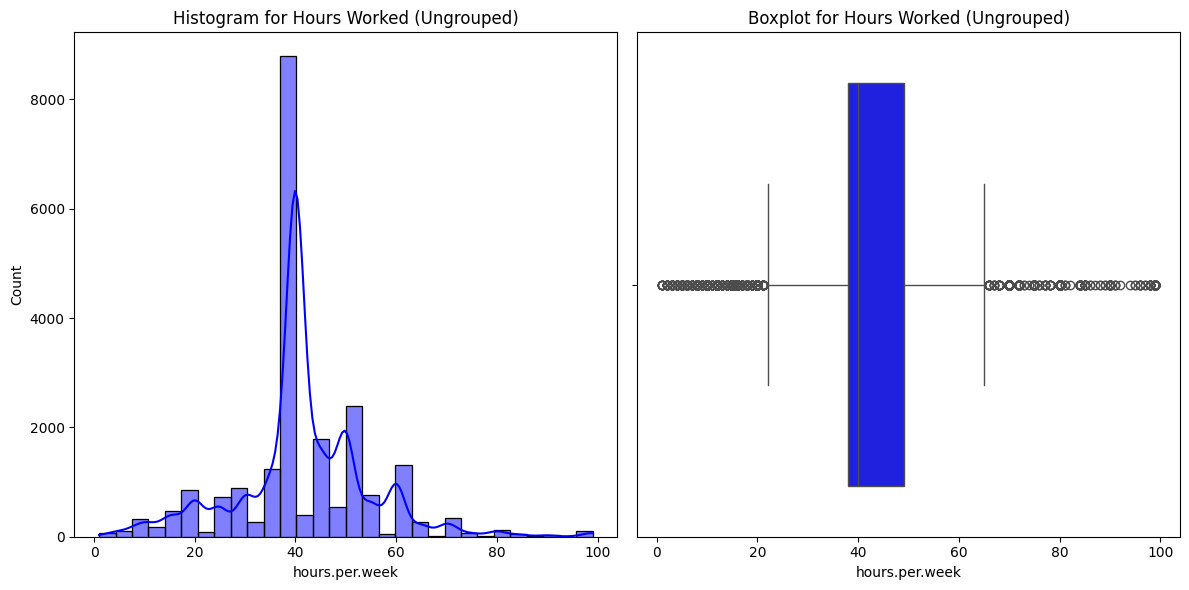

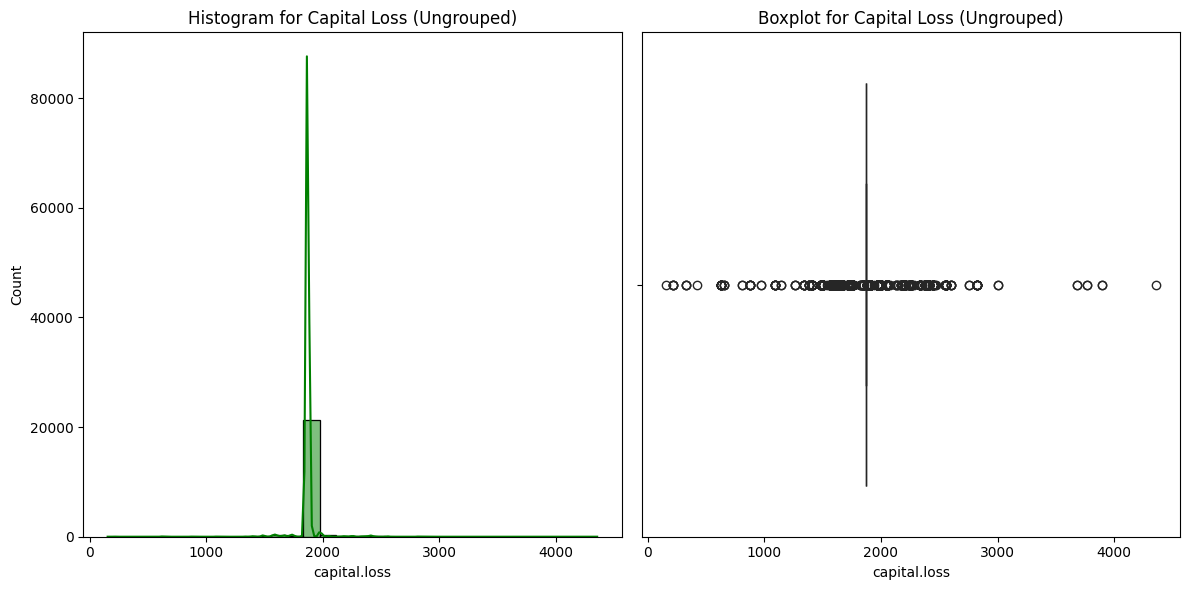

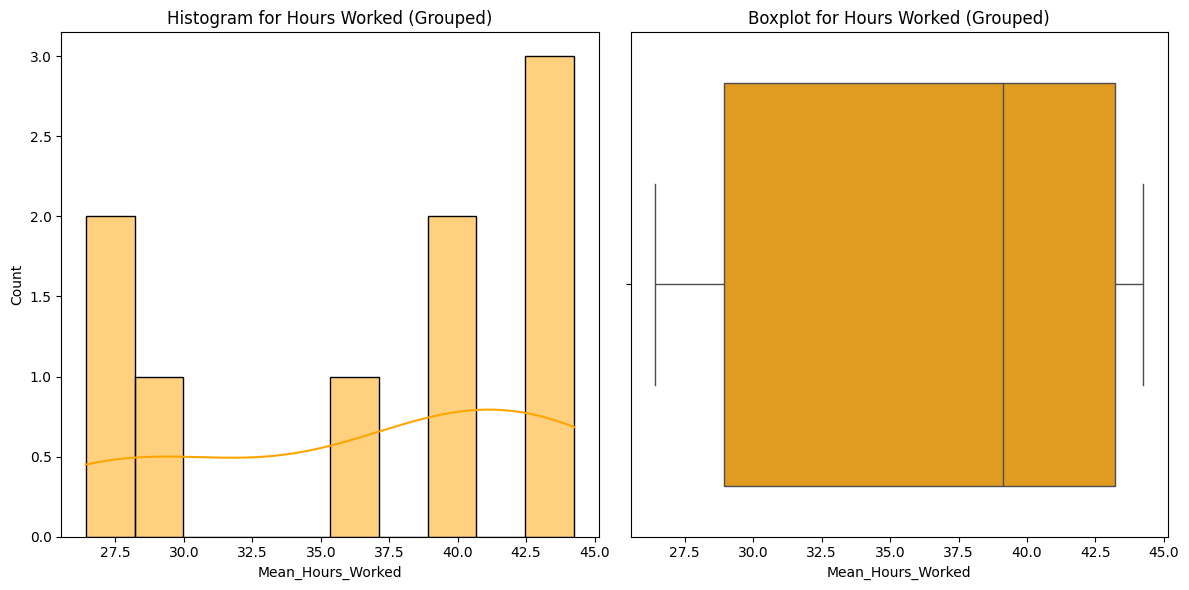

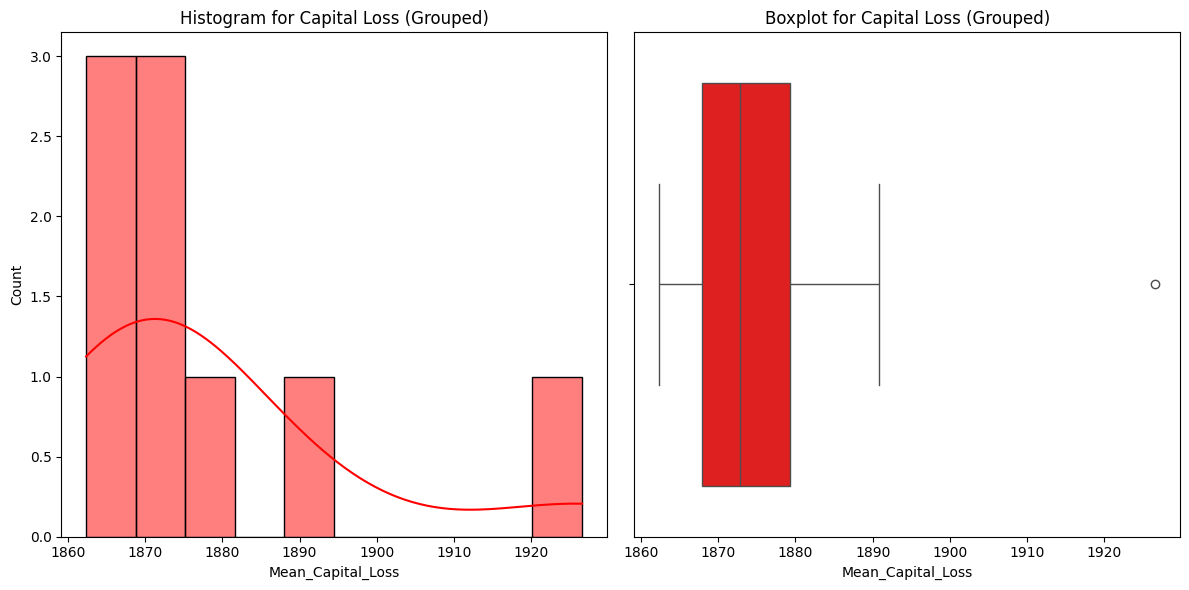

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Load the dataset
df1 = pd.read_csv('/content/final-data.csv')

# Frequency Distribution for Age
age_bins = [i for i in range(0, 101, 10)]  # Define age bins in 10-year intervals
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Label the bins
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Assign age bin to each record

# Create frequency table for Age with Mean Hours Worked and Mean Capital Loss
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),  # Count number of occurrences for each age group
    Mean_Hours_Worked=('hours.per.week', 'mean'),  # Calculate mean hours worked per group
    Mean_Capital_Loss=('capital.loss', 'mean')  # Calculate mean capital loss per group
).reset_index()

# Add midpoints for each age bin to the frequency table
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Calculate midpoint for each bin
)

# --- Skewness Functions ---

# Bowley's Skewness for ungrouped data
def bowley_skewness(data):
    Q1 = np.percentile(data, 25)  # First quartile (25th percentile)
    Q2 = np.median(data)  # Median (50th percentile)
    Q3 = np.percentile(data, 75)  # Third quartile (75th percentile)
    skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)  # Bowley's skewness formula
    return skewness

# Karl Pearson's Skewness for ungrouped data
def karl_pearson_skewness(data):
    mean = np.mean(data)  # Calculate mean
    median = np.median(data)  # Calculate median
    std_dev = np.std(data)  # Calculate standard deviation
    skewness = (3 * (mean - median)) / std_dev  # Karl Pearson’s skewness formula
    return skewness

# --- Skewness for Ungrouped Data ---
# Skewness for **Hours Worked** (Ungrouped Data)
bowley_skewness_hours = bowley_skewness(df1['hours.per.week'])
karl_pearson_skewness_hours = karl_pearson_skewness(df1['hours.per.week'])
print(f"Bowley's Skewness for Hours Worked (Ungrouped): {bowley_skewness_hours}")
print(f"Karl Pearson's Skewness for Hours Worked (Ungrouped): {karl_pearson_skewness_hours}")

# Skewness for **Capital Loss** (Ungrouped Data)
bowley_skewness_loss = bowley_skewness(df1['capital.loss'])
karl_pearson_skewness_loss = karl_pearson_skewness(df1['capital.loss'])
print(f"Bowley's Skewness for Capital Loss (Ungrouped): {bowley_skewness_loss}")
print(f"Karl Pearson's Skewness for Capital Loss (Ungrouped): {karl_pearson_skewness_loss}")

# --- Skewness for Grouped Data ---
def bowley_skewness_grouped(freq_table, column_name):
    Q1 = np.percentile(freq_table[column_name], 25)  # First quartile for grouped data
    Q2 = np.median(freq_table[column_name])  # Median for grouped data
    Q3 = np.percentile(freq_table[column_name], 75)  # Third quartile for grouped data
    skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)  # Bowley's skewness formula
    return skewness

# Skewness for **Hours Worked** (Grouped Data)
bowley_skewness_hours_grouped = bowley_skewness_grouped(freq_table_age, 'Mean_Hours_Worked')
karl_pearson_skewness_hours_grouped = karl_pearson_skewness(freq_table_age['Mean_Hours_Worked'])
print(f"Bowley's Skewness for Hours Worked (Grouped): {bowley_skewness_hours_grouped}")
print(f"Karl Pearson's Skewness for Hours Worked (Grouped): {karl_pearson_skewness_hours_grouped}")

# Skewness for **Capital Loss** (Grouped Data)
bowley_skewness_loss_grouped = bowley_skewness_grouped(freq_table_age, 'Mean_Capital_Loss')
karl_pearson_skewness_loss_grouped = karl_pearson_skewness(freq_table_age['Mean_Capital_Loss'])
print(f"Bowley's Skewness for Capital Loss (Grouped): {bowley_skewness_loss_grouped}")
print(f"Karl Pearson's Skewness for Capital Loss (Grouped): {karl_pearson_skewness_loss_grouped}")

# --- Shape of Distribution (Visualization) ---
# Plotting histograms and boxplots to visually assess skewness and distribution shape

# Ungrouped Data: Hours Worked
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1['hours.per.week'], kde=True, color='blue', bins=30)
plt.title('Histogram for Hours Worked (Ungrouped)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['hours.per.week'], color='blue')
plt.title('Boxplot for Hours Worked (Ungrouped)')

plt.tight_layout()
plt.show()

# Ungrouped Data: Capital Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1['capital.loss'], kde=True, color='green', bins=30)
plt.title('Histogram for Capital Loss (Ungrouped)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['capital.loss'], color='green')
plt.title('Boxplot for Capital Loss (Ungrouped)')

plt.tight_layout()
plt.show()

# Grouped Data: Hours Worked (Frequency Distribution)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(freq_table_age['Mean_Hours_Worked'], kde=True, color='orange', bins=10)
plt.title('Histogram for Hours Worked (Grouped)')

plt.subplot(1, 2, 2)
sns.boxplot(x=freq_table_age['Mean_Hours_Worked'], color='orange')
plt.title('Boxplot for Hours Worked (Grouped)')

plt.tight_layout()
plt.show()

# Grouped Data: Capital Loss (Frequency Distribution)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(freq_table_age['Mean_Capital_Loss'], kde=True, color='red', bins=10)
plt.title('Histogram for Capital Loss (Grouped)')

plt.subplot(1, 2, 2)
sns.boxplot(x=freq_table_age['Mean_Capital_Loss'], color='red')
plt.title('Boxplot for Capital Loss (Grouped)')

plt.tight_layout()
plt.show()


#Karl Pearson's Measure of Skewness

In [185]:
import pandas as pd
import numpy as np

# Data
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution for Age ---
age_bins = [i for i in range(0, 101, 10)]  # Bin age in intervals of 10 years
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Create labels for bins
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Bin the age data

# Grouped frequency distribution table for Age
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Calculate midpoints of each bin for age
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Midpoint of age bin
)

# --- Karl Pearson's Skewness Function ---
def karl_pearson_skewness(data):
    # Calculate Karl Pearson's Skewness
    mean = np.mean(data)  # Mean of the data
    median = np.median(data)  # Median of the data
    std_dev = np.std(data)  # Standard deviation of the data
    skewness = (3 * (mean - median)) / std_dev  # Pearson's skewness formula
    return skewness

# Karl Pearson's Skewness for **Hours Worked** (Ungrouped Data)
karl_pearson_skewness_hours = karl_pearson_skewness(df1['hours.per.week'])
print(f"Karl Pearson's Skewness for Hours Worked: {karl_pearson_skewness_hours}")

# Karl Pearson's Skewness for **Capital Loss** (Ungrouped Data)
karl_pearson_skewness_loss = karl_pearson_skewness(df1['capital.loss'])
print(f"Karl Pearson's Skewness for Capital Loss: {karl_pearson_skewness_loss}")

# --- Karl Pearson's Skewness for Grouped Data ---
def karl_pearson_skewness_grouped(freq_table, column_name):
    # Calculate skewness for grouped data
    mean_value = np.mean(freq_table[column_name])  # Mean for grouped data
    median_value = np.median(freq_table[column_name])  # Median for grouped data
    std_dev_value = np.std(freq_table[column_name])  # Standard deviation for grouped data
    skewness_grouped = (3 * (mean_value - median_value)) / std_dev_value  # Pearson's skewness for grouped data
    return skewness_grouped

# Karl Pearson's Skewness for **Hours Worked** (Grouped Data)
karl_pearson_skewness_hours_grouped = karl_pearson_skewness_grouped(freq_table_age, 'Mean_Hours_Worked')
print(f"Karl Pearson's Skewness for Hours Worked (Grouped): {karl_pearson_skewness_hours_grouped}")

# Karl Pearson's Skewness for **Capital Loss** (Grouped Data)
karl_pearson_skewness_loss_grouped = karl_pearson_skewness_grouped(freq_table_age, 'Mean_Capital_Loss')
print(f"Karl Pearson's Skewness for Capital Loss (Grouped): {karl_pearson_skewness_loss_grouped}")


Karl Pearson's Skewness for Hours Worked: 0.3251298283479145
Karl Pearson's Skewness for Capital Loss: -0.0004096188433597952
Karl Pearson's Skewness for Hours Worked (Grouped): nan
Karl Pearson's Skewness for Capital Loss (Grouped): nan


<ipython-input-185-60dc406a36bb>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(


#Bowley's Measure of Skewness


In [186]:
import pandas as pd
import numpy as np

# Data: Load the dataset
df1 = pd.read_csv('/content/final-data.csv')

# Frequency Distribution for Age
age_bins = [i for i in range(0, 101, 10)]  # Define age bins in 10-year intervals
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]  # Label the bins
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)  # Assign age bin to each record

# Create frequency table for Age with Mean Hours Worked and Mean Capital Loss
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),  # Count number of occurrences for each age group
    Mean_Hours_Worked=('hours.per.week', 'mean'),  # Calculate mean hours worked per group
    Mean_Capital_Loss=('capital.loss', 'mean')  # Calculate mean capital loss per group
).reset_index()

# Add midpoints for each age bin to the frequency table
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2  # Calculate midpoint for each bin
)

# --- Bowley's Skewness Function ---
def bowley_skewness(data):
    # Calculate Bowley's Skewness for ungrouped data
    Q1 = np.percentile(data, 25)  # First quartile (25th percentile)
    Q2 = np.median(data)  # Median (50th percentile)
    Q3 = np.percentile(data, 75)  # Third quartile (75th percentile)
    skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)  # Bowley's skewness formula
    return skewness

# Bowley's Skewness for **Hours Worked** (Ungrouped Data)
bowley_skewness_hours = bowley_skewness(df1['hours.per.week'])
print(f"Bowley's Skewness for Hours Worked: {bowley_skewness_hours}")

# Bowley's Skewness for **Capital Loss** (Ungrouped Data)
bowley_skewness_loss = bowley_skewness(df1['capital.loss'])
print(f"Bowley's Skewness for Capital Loss: {bowley_skewness_loss}")

# --- Bowley's Skewness for Grouped Data ---
def bowley_skewness_grouped(freq_table, column_name):
    # Calculate Bowley's Skewness for grouped data
    Q1 = np.percentile(freq_table[column_name], 25)  # First quartile for grouped data
    Q2 = np.median(freq_table[column_name])  # Median for grouped data
    Q3 = np.percentile(freq_table[column_name], 75)  # Third quartile for grouped data
    skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)  # Bowley's skewness formula
    return skewness

# Bowley's Skewness for **Hours Worked** (Grouped Data)
bowley_skewness_hours_grouped = bowley_skewness_grouped(freq_table_age, 'Mean_Hours_Worked')
print(f"Bowley's Skewness for Hours Worked (Grouped): {bowley_skewness_hours_grouped}")

# Bowley's Skewness for **Capital Loss** (Grouped Data)
bowley_skewness_loss_grouped = bowley_skewness_grouped(freq_table_age, 'Mean_Capital_Loss')
print(f"Bowley's Skewness for Capital Loss (Grouped): {bowley_skewness_loss_grouped}")


Bowley's Skewness for Hours Worked: 0.6363636363636364
Bowley's Skewness for Capital Loss: nan
Bowley's Skewness for Hours Worked (Grouped): nan
Bowley's Skewness for Capital Loss (Grouped): nan


<ipython-input-186-8ea107681d26>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(
<ipython-input-186-8ea107681d26>:30: RuntimeWarning: invalid value encountered in scalar divide
  skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)  # Bowley's skewness formula


#moments and measures using moments

In [188]:
import pandas as pd
import numpy as np
from scipy import stats

# Data
df1 = pd.read_csv('/content/final-data.csv')

# --- Frequency Distribution ---
age_bins = [i for i in range(0, 101, 10)]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]
df1['Age_Binned'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
freq_table_age = df1.groupby('Age_Binned').agg(
    Frequency=('age', 'size'),
    Mean_Hours_Worked=('hours.per.week', 'mean'),
    Mean_Capital_Loss=('capital.loss', 'mean')
).reset_index()

# Midpoints
freq_table_age['Midpoint'] = freq_table_age['Age_Binned'].astype(str).apply(
    lambda r: (int(r.split('-')[0]) + int(r.split('-')[1])) / 2
)

# --- Moment Functions ---
def calculate_moments(data, n):
    mean = np.mean(data)
    moment = np.mean((data - mean) ** n)
    return moment

# Moments for Hours Worked (Ungrouped Data)
first_moment_hours = calculate_moments(df1['hours.per.week'], 1)
second_moment_hours = calculate_moments(df1['hours.per.week'], 2)
third_moment_hours = calculate_moments(df1['hours.per.week'], 3)
fourth_moment_hours = calculate_moments(df1['hours.per.week'], 4)

# Moments for Capital Loss (Ungrouped Data)
first_moment_loss = calculate_moments(df1['capital.loss'], 1)
second_moment_loss = calculate_moments(df1['capital.loss'], 2)
third_moment_loss = calculate_moments(df1['capital.loss'], 3)
fourth_moment_loss = calculate_moments(df1['capital.loss'], 4)

# --- Print Results ---
print(f"First Moment (Mean) for Hours Worked: {first_moment_hours}")
print(f"First Moment (Mean) for Capital Loss: {first_moment_loss}")
print(f"Second Moment (Variance) for Hours Worked: {second_moment_hours}")
print(f"Second Moment (Variance) for Capital Loss: {second_moment_loss}")
print(f"Third Moment (Skewness) for Hours Worked: {third_moment_hours}")
print(f"Third Moment (Skewness) for Capital Loss: {third_moment_loss}")
print(f"Fourth Moment (Kurtosis) for Hours Worked: {fourth_moment_hours}")
print(f"Fourth Moment (Kurtosis) for Capital Loss: {fourth_moment_loss}")


First Moment (Mean) for Hours Worked: 7.148830974230257e-16
First Moment (Mean) for Capital Loss: -3.1855190821170025e-13
Second Moment (Variance) for Hours Worked: 177.89983438013107
Second Moment (Variance) for Capital Loss: 8603.755187870938
Third Moment (Skewness) for Hours Worked: 718.8448997448235
Third Moment (Skewness) for Capital Loss: 207867.0766326052
Fourth Moment (Kurtosis) for Hours Worked: 164402.9662313235
Fourth Moment (Kurtosis) for Capital Loss: 11666866214.263908


<ipython-input-188-30aaa52cf5ee>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table_age = df1.groupby('Age_Binned').agg(
